In [ ]:
import torch
from torch import nn

In [ ]:
import matplotlib.pyplot as plt

## 1. Data: Preparing & Loading

ML is consists of 2 main parts:
1. Get data into numerical representation
2. Build a model to learn patterns in that numerical representation

In [ ]:
# Create known paramters to generate a straight line
weight = 0.7
bias = 0.3

# Create X and y values
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = bias + weight*X


In [ ]:
# Split data into training and testing sets
train_split = int(0.8*len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
# Create linear regression model
class LinReg(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))

  # define forward method - this defines the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias



In [ ]:
# Set seed for reproducability
torch.manual_seed(0)

# Create Linear Regression model object
model0 = LinReg()

In [ ]:
# List model parameters
list(model0.parameters())

# List named parameters
model0.state_dict()

OrderedDict([('weights', tensor([1.5410])), ('bias', tensor([-0.2934]))])

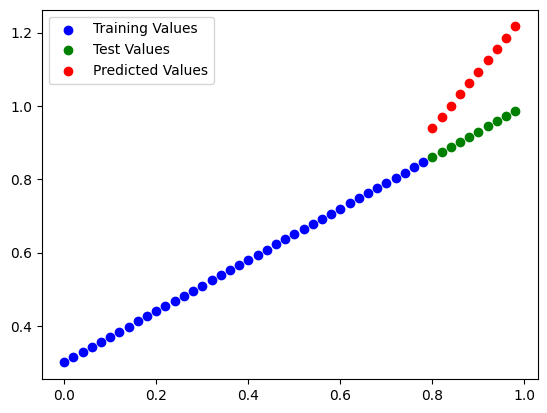

In [ ]:
# Predict testing data with untrained model
with torch.inference_mode():
  y_preds = model0(X_test)

# Plot current predictions without training
plt.scatter(X_train, y_train, c='b', label='Training Values')
plt.scatter(X_test, y_test, c='g', label='Test Values')
plt.scatter(X_test, y_preds, c='r', label='Predicted Values')

plt.legend()
plt.show()

In [ ]:
import torch.optim as optim

# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = optim.SGD(model0.parameters(),
                      lr=0.01, # Learning Rate controls the step size in the optimization
                      momentum=0)   # Momentum controls the momentum of the optimizer

### Building a training loop (and testing loop) in PyTorch

Steps in the training loop:
0. Loop through the data
1. Forward pass the data through the model (using the models 'forward()' function) to make predictions on the data - a.k.a. Forward propagation
2. Calculate the loss
3. optim.zero_grad() - prevents accumulation of optim.step()
4. loss.backward() - calculate the gradients of the parameters in the model - (**back propagation**)
5. optim.step() - use optimizer to adjust the models parameters to improve the loss (**gradient descent**)

In [ ]:
# An epoch is one loop through the data - num_epochs is a hyperparameter
num_epochs = 100

# 0. Loop through the data
for epoch in range(num_epochs):

    # Training loop
    model0.train()   # Set the model to training mode

    output = model0(X_train)  # 1. Forward pass of data through model
    loss = loss_fn(output, y_train)  # 2. Calculate loss

    optimizer.zero_grad()   # 3. Set optimizer gradient to zero
    loss.backward()   # 4. Perform back propagation on loss w.r.t. parameters of the model
    optimizer.step()   # 5. Perform gradient descent

    # Testing loop
    model0.eval()  # Set the model to testing mode

    with torch.inference_mode():  # torch.inference_mode() turns off gradient tracking
      test_preds = model0(X_test)  # Carry out forward pass

      test_loss = loss_fn(test_preds, y_test)  # Calculate the loss function

    if epoch % 10 == 0:
      print(f"Epoch: {epoch}, Loss: {loss}, Test Loss: {test_loss}")



Epoch: 0, Loss: 0.27290406823158264, Test Loss: 0.16519367694854736
Epoch: 10, Loss: 0.22472169995307922, Test Loss: 0.2433406412601471
Epoch: 20, Loss: 0.201097771525383, Test Loss: 0.29282358288764954
Epoch: 30, Loss: 0.18786200881004333, Test Loss: 0.32511013746261597
Epoch: 40, Loss: 0.17970390617847443, Test Loss: 0.34498992562294006
Epoch: 50, Loss: 0.17393237352371216, Test Loss: 0.356270968914032
Epoch: 60, Loss: 0.16935725510120392, Test Loss: 0.36119240522384644
Epoch: 70, Loss: 0.165230393409729, Test Loss: 0.3639999330043793
Epoch: 80, Loss: 0.16156136989593506, Test Loss: 0.361240416765213
Epoch: 90, Loss: 0.15803322196006775, Test Loss: 0.3570892810821533


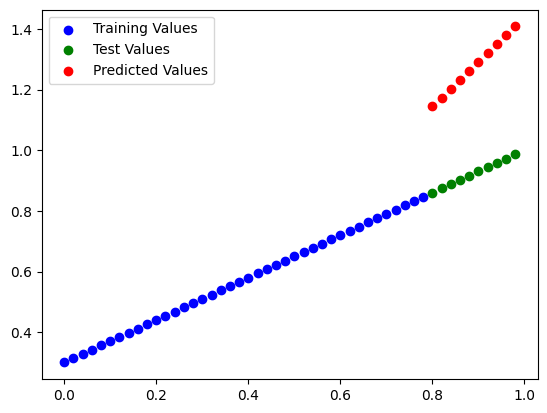

In [ ]:
# Plot predictions after training model with 1 epoch
with torch.inference_mode():
  y_preds = model0(X_test)

plt.scatter(X_train, y_train, c='b', label='Training Values')
plt.scatter(X_test, y_test, c='g', label='Test Values')
plt.scatter(X_test, y_preds, c='r', label='Predicted Values')

plt.legend()
plt.show()

### Practice writing the above

In [ ]:
# Define model class
class linregmodel(nn.Module):
  def __init__(self):
    super().__init__()
    # Here we define the model parameters/layers
    self.weight = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype = torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor():
    output = self.weight * x + self.bias
    return output


In [ ]:
# Create model
torch.manual_seed(42)
model1 = linregmodel()

# Define training and testing values
X = torch.arange(0,1, 0.02)
y = 0.7 + 0.3*X
threshold = int(0.8*len(X))

X_train = X[:threshold]
y_train = y[:threshold]

X_test = X[threshold:]
y_test = y[threshold:]

In [ ]:
# Define number of loss and optimizer
loss_fn = nn.L1Loss()
optimizer = optim.SGD(model1.parameters(),
                       lr=0.01,
                       momentum=0.0)

# Create lists to store loss values
epoch_num = []
train_loss_vals = []
test_loss_vals = []

In [ ]:
# Create training and testing loops
num_epochs = 1000

for epoch in range(num_epochs):

  # Create training loop
  model1.train()  # Set model to training mode

  output = model1(X_train)  # Carry out forward propagation
  train_loss = loss_fn(output, y_train)  # Calculate training loss

  optimizer.zero_grad()  # Reset optimizer gradient
  train_loss.backward()  # Carry out backpropagation
  optimizer.step()  # Update parameter values

  # Create testing loop
  with torch.inference_mode():
    preds = model1(X_test)   # Generate predictions of testing data
    test_loss = loss_fn(preds, y_test)   # Calculate loss of testing predictions

  epoch_num.append(epoch)
  train_loss_vals.append(train_loss)
  test_loss_vals.append(test_loss)

  if epoch % 50 == 0:
    print(f"Epoch: {epoch}, Training Loss: {train_loss}, Testing Loss: {test_loss}")




Epoch: 0, Training Loss: 0.556881308555603, Testing Loss: 0.5250651240348816
Epoch: 50, Training Loss: 0.04522073268890381, Testing Loss: 0.08176179975271225
Epoch: 100, Training Loss: 0.025997888296842575, Testing Loss: 0.05985529348254204
Epoch: 150, Training Loss: 0.008829416707158089, Testing Loss: 0.0198671817779541
Epoch: 200, Training Loss: 0.008988434448838234, Testing Loss: 0.00538221001625061
Epoch: 250, Training Loss: 0.008988434448838234, Testing Loss: 0.00538221001625061
Epoch: 300, Training Loss: 0.008988434448838234, Testing Loss: 0.00538221001625061
Epoch: 350, Training Loss: 0.008988434448838234, Testing Loss: 0.00538221001625061
Epoch: 400, Training Loss: 0.008988434448838234, Testing Loss: 0.00538221001625061
Epoch: 450, Training Loss: 0.008988434448838234, Testing Loss: 0.00538221001625061
Epoch: 500, Training Loss: 0.008988434448838234, Testing Loss: 0.00538221001625061
Epoch: 550, Training Loss: 0.008988434448838234, Testing Loss: 0.00538221001625061
Epoch: 600, T

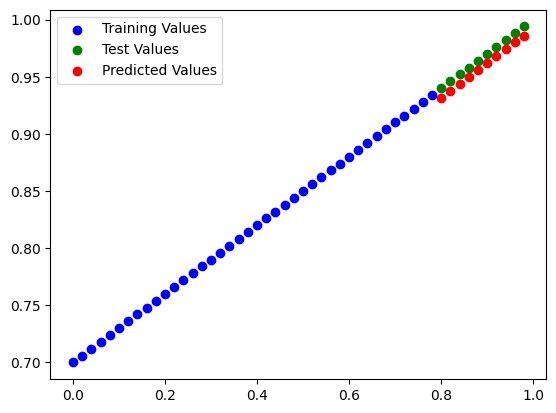

In [ ]:
# Plot training & testing data and predictions

plt.scatter(X_train, y_train, c='b', label='Training Values')
plt.scatter(X_test, y_test, c='g', label='Test Values')
plt.scatter(X_test, preds, c='r', label='Predicted Values')

plt.legend()
plt.show()

## Neural Network Classification

In [ ]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples of circles
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
# Create a DataFrame containing the circles data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})

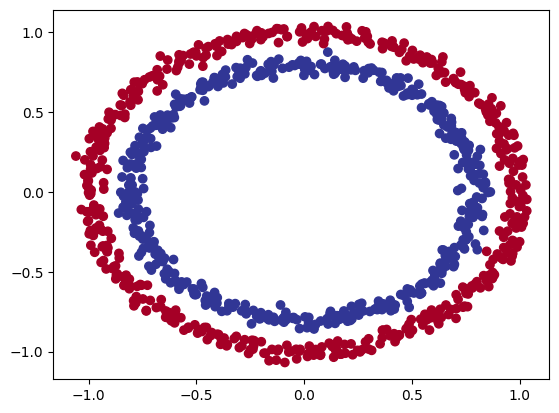

In [ ]:
plt.scatter(X[:,0],
            X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [ ]:
# Turn data into tensors
X_tensor = torch.Tensor(X)
y_tensor = torch.Tensor(y)

In [ ]:
X.dtype, X_tensor.dtype

(dtype('float64'), torch.float32)

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
class CircleClassifierV0(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer1 = nn.Linear(in_features=2, out_features=5)
    self.layer2 = nn.Linear(in_features= 5, out_features=1)

  def forward(self, x):
    return self.layer2(self.layer1(x))


circle_model0 = CircleClassifierV0()

In [ ]:
circle_model1 = nn.Sequential(
                              nn.Linear(2, 5),
                              nn.Linear(5, 1),
                              )



In [ ]:
with torch.inference_mode():
  untrained_preds0 = circle_model0(X_test)
  untrained_preds1 = circle_model1(X_test)

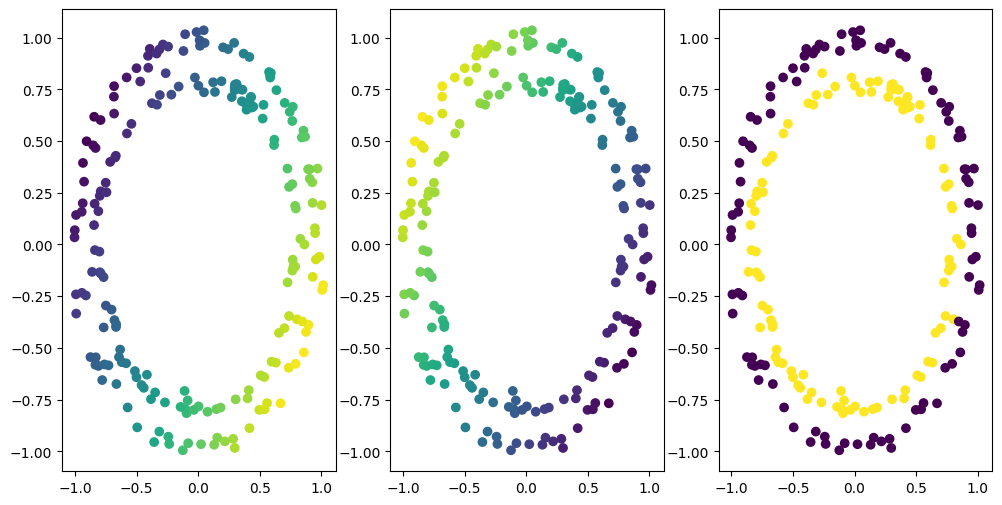

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(12,6))

ax[0].scatter(x=X_test[:,0],y=X_test[:,1], c=untrained_preds0)
ax[1].scatter(x=X_test[:,0],y=X_test[:,1], c=untrained_preds1)
ax[2].scatter(x=X_test[:,0],y=X_test[:,1], c=y_test)

In [ ]:
# Set up loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = optim.SGD(circle_model1.parameters(),
                        lr=0.01,
                        momentum=0.005)

# Create list with training and testing losses
epoch_num = []
train_losses = []
test_losses = []

In [ ]:
# Create Training & Testing loops
num_epochs = 10000

for epoch in range(num_epochs):
  # Create training loop
  circle_model1.train()

  train_logits = circle_model1(X_train)
  train_pred_probs = torch.sigmoid(train_logits)
  train_preds = torch.round(train_pred_probs)   # Carry out forward pass
  train_loss = loss_fn(train_preds, y_train.reshape((-1,1)))   # Calculate Loss

  optimizer.zero_grad()   # Reset optimizer gradient
  train_loss.backward()   # Carry out back propagation
  optimizer.step()   # Update model parameters

  # Create testing loop
  circle_model1.eval()
  with torch.inference_mode():
    test_logits = circle_model1(X_test)
    test_pred_probs = torch.sigmoid(test_logits)
    test_preds = torch.round(test_pred_probs)
    test_loss = loss_fn(test_preds, y_test.reshape((-1,1)))


  # Add loss values to lists
  if epoch % 10 == 0:
    epoch_num.append(epoch)
    train_losses.append(train_loss.detach())
    test_losses.append(test_loss)


In [ ]:
# Create final test predictions
with torch.inference_mode():
  test_preds = torch.round(torch.sigmoid(circle_model1(X_test)))

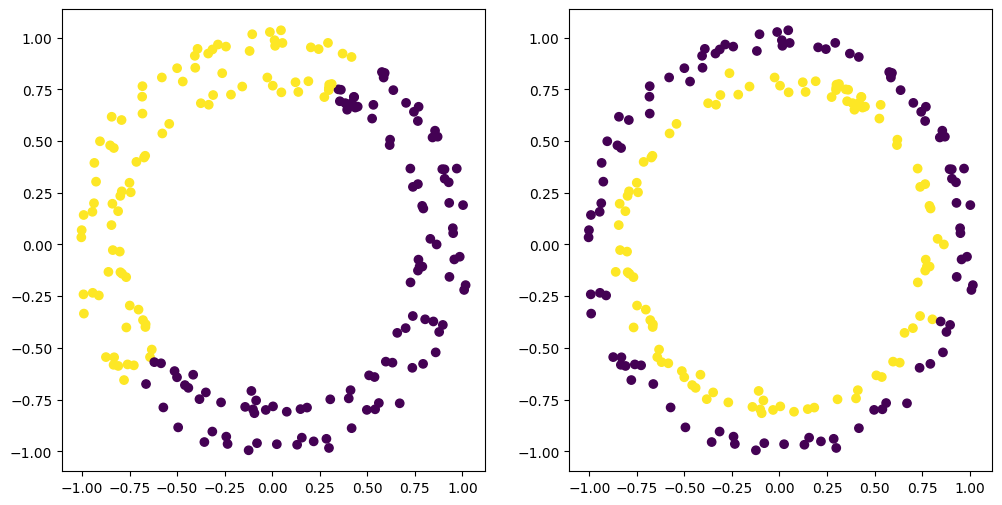

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].scatter(x=X_test[:,0],y=X_test[:,1], c=test_preds)
ax[1].scatter(x=X_test[:,0],y=X_test[:,1], c=y_test)
plt.show()

In [ ]:
import requests
from pathlib import Path

# Download helper functions
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper functions")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


from helper_functions import plot_predictions, plot_decision_boundary


In [ ]:
circle_model1.train()

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

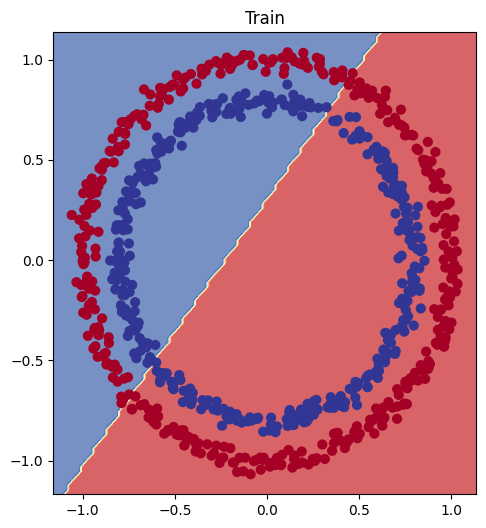

In [ ]:
# Plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(circle_model1, X_train, y_train)

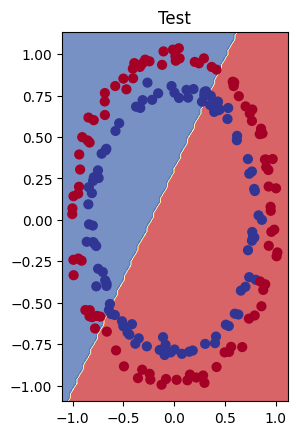

In [ ]:
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(circle_model1, X_test, y_test)

## Improving the Model

Options for improving the model are:
1. Add more layers
2. Add more hidden nodes
3. Fit for longer
4. Change the activation function
5. Change the learning rate
6. Change the loss function

In [ ]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(2,10)
    self.layer2 = nn.Linear(10, 10)
    self.layer3 = nn.Linear(10,1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.layer1(x))))

model2 = CircleModelV2()

In [ ]:
# Set up loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = optim.SGD(model2.parameters(),
                        lr=0.01,
                        momentum=0.005)

# Create list with training and testing losses
epoch_num = []
train_losses = []
test_losses = []

In [ ]:
# Create Training & Testing loops
num_epochs = 10000

for epoch in range(num_epochs):
  # Create training loop
  model2.train()

  train_logits = model2(X_train)
  train_pred_probs = torch.sigmoid(train_logits)
  train_preds = torch.round(train_pred_probs)   # Carry out forward pass
  train_loss = loss_fn(train_logits, y_train.reshape((-1,1)))   # Calculate Loss

  optimizer.zero_grad()   # Reset optimizer gradient
  train_loss.backward()   # Carry out back propagation
  optimizer.step()   # Update model parameters

  # Create testing loop
  model2.eval()
  with torch.inference_mode():
    test_logits = model2(X_test)
    test_pred_probs = torch.sigmoid(test_logits)
    test_preds = torch.round(test_pred_probs)
    test_loss = loss_fn(test_logits, y_test.reshape((-1,1)))


  # Add loss values to lists
  if epoch % 10 == 0:
    epoch_num.append(epoch)
    train_losses.append(train_loss.detach())
    test_losses.append(test_loss)

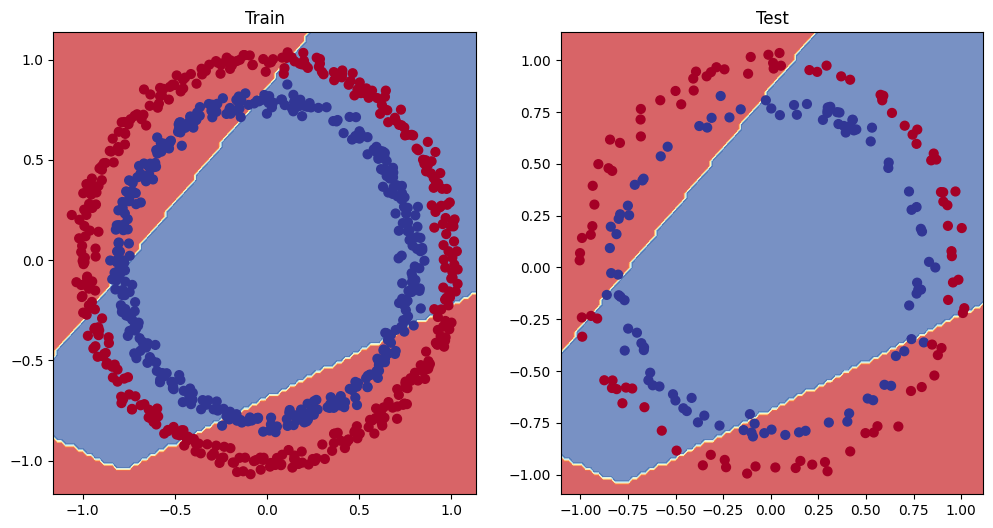

In [ ]:
# Plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model2, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model2, X_test, y_test)

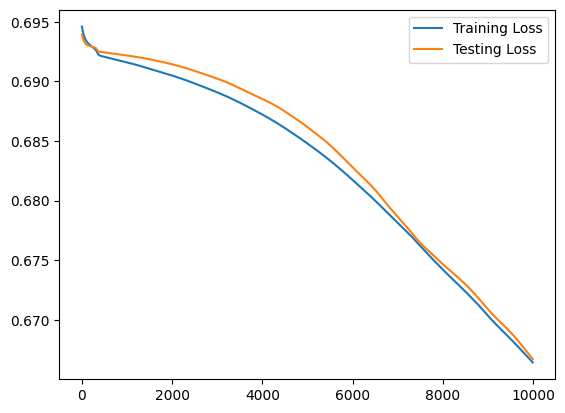

In [ ]:
# Plot training and testing losses
plt.figure()
plt.plot(epoch_num, train_losses, label='Training Loss')
plt.plot(epoch_num, test_losses, label='Testing Loss')

plt.legend()
plt.show()

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import torch.optim as optim

In [ ]:
### Trying to improve the model

# We will add an extra hidden layer (4 hidden layers in total)
# Increase the number of nodes in the internal layers to 64


class CircleModelV3(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer0 = nn.Linear(2,16)
    self.layer1 = nn.Linear(16,32)
    self.layer2 = nn.Linear(32,8)
    self.layer3 = nn.Linear(8,1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(self.relu(self.layer0(x)))))))


model3 = CircleModelV3()

In [ ]:
# Define loss function and otpimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = optim.SGD(model3.parameters(),
                      lr = 0.05)

# Define lists contating training and testing losses
epoch_num = []
train_losses = []
test_losses = []

In [ ]:
# Set up GPU and move optimizer and loss function to it
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

loss_fn = loss_fn.to(device)
#optimizer = optimizer.to(device)
model3 = model3.to(device)

# Move datasets to GPU
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

cuda


In [ ]:
# Train for 30000 epochs
num_epochs = 30000

for epoch in range(num_epochs):

  # Training Loop
  model3.train()

  outputs = model3(X_train)  # Forward propagation
  train_loss = loss_fn(outputs, y_train.reshape((-1,1)))  # Calculate training loss

  optimizer.zero_grad()  # Reset optimizer gradient
  train_loss.backward()  # Backward propagation
  optimizer.step()  # Update model weights



  # Testing Loop
  model3.eval()
  with torch.inference_mode():
    test_preds = model3(X_test)
    test_loss = loss_fn(test_preds, y_test.reshape((-1,1)))

  if epoch % 500 == 0:
    epoch_num.append(epoch)
    train_losses.append(train_loss.detach().cpu())
    test_losses.append(test_loss.cpu())

  if epoch % 5000 == 0:
    print(f"Epoch: {epoch}, Training Loss: {train_loss}, Testing Loss: {test_loss}")



Epoch: 0, Training Loss: 0.6948147416114807, Testing Loss: 0.6945908069610596
Epoch: 5000, Training Loss: 0.0020019677467644215, Testing Loss: 0.009612795896828175
Epoch: 10000, Training Loss: 0.0007122883689589798, Testing Loss: 0.005710380617529154
Epoch: 15000, Training Loss: 0.00042947466135956347, Testing Loss: 0.004574139602482319
Epoch: 20000, Training Loss: 0.000306452828226611, Testing Loss: 0.003974088467657566
Epoch: 25000, Training Loss: 0.00023719451564829797, Testing Loss: 0.0035623377189040184


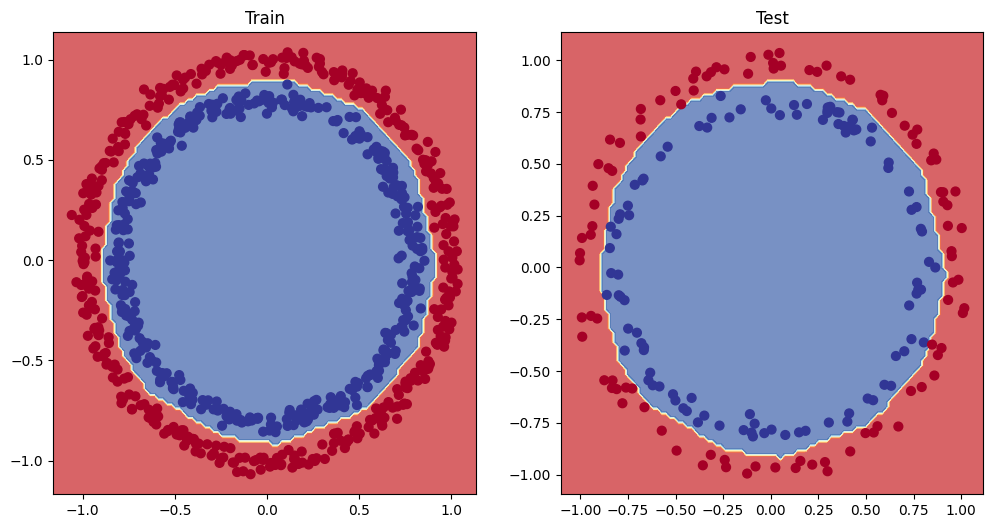

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model3, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model3, X_test, y_test)

## Multi-Class Classification Model

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
import requests
from pathlib import Path

# Download helper functions
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper functions")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


In [ ]:
### Creating toy multi-class dataset

# Set model creation hyperparameters
N_CLASSES = 4
N_FEATURES = 2
SEED = 42

# Create dataset
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=N_FEATURES,
                            centers = N_CLASSES,
                            cluster_std = 1.5,
                            random_state=SEED)

# Turn data into tensors
X_blob = torch.Tensor(X_blob)
y_blob = torch.Tensor(y_blob)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob,
                                                    test_size=0.2,
                                                    random_state=SEED)

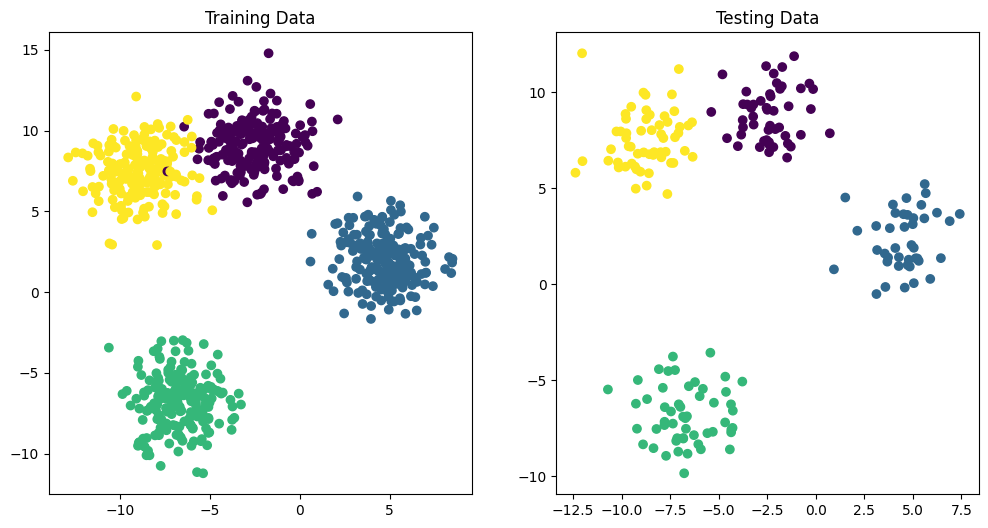

In [ ]:
# Visualise the data
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Training Data")
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

plt.subplot(1,2,2)
plt.title("Testing Data")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)

plt.show()

In [ ]:
# Create Blob Classification Model

class BlobClassifierV0(nn.Module):
  def __init__(self, input_feats, output_feats, hidden_units=32):
    super().__init__()

    self.linear_layer_stack = nn.Sequential(
        nn.Linear(input_feats, hidden_units),
        nn.ReLU(),
        nn.Linear(hidden_units, hidden_units),
        nn.ReLU(),
        nn.Linear(hidden_units, output_feats)
        )

  def forward(self, x):
    return self.linear_layer_stack(x)

model0 = BlobClassifierV0(input_feats=2, output_feats=4)

In [ ]:
# Define loss function & optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model0.parameters(),
                            lr = 0.03)

# Create lists in which to store training and testing loss values
epoch_num = []
train_losses = []
test_losses = []

In [ ]:
# Set up device agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Move model, data, loss_fn to GPU
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

loss_fn  = loss_fn.to(device)

model0 = model0.to(device)

cuda


In [ ]:
y_train.type(torch.LongTensor).to(device).device

device(type='cuda', index=0)

In [ ]:
# Train for 30000 epochs
num_epochs = 30000

for epoch in range(num_epochs):
  # Create training loop
  model0.train()

  train_preds = model0(X_train)
  train_loss = loss_fn(train_preds, y_train.type(torch.LongTensor).to(device))

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  # Create testing loop
  model0.eval()
  with torch.inference_mode():
    test_preds = model0(X_test)
    test_loss = loss_fn(test_preds, y_test.type(torch.LongTensor).to(device))

  if epoch % 500 == 0:
    epoch_num.append(epoch)
    train_losses.append(train_loss.detach().cpu())
    test_losses.append(test_loss.cpu())

  if epoch % 5000 == 0:
    print(f"Epoch: {epoch}, Train Loss: {train_loss}, Test Loss: {test_loss}")


Epoch: 0, Train Loss: 1.5756101608276367, Test Loss: 1.3961313962936401
Epoch: 5000, Train Loss: 0.020274493843317032, Test Loss: 0.008901732973754406
Epoch: 10000, Train Loss: 0.017580054700374603, Test Loss: 0.006136302836239338
Epoch: 15000, Train Loss: 0.016101635992527008, Test Loss: 0.00449887290596962
Epoch: 20000, Train Loss: 0.015308183617889881, Test Loss: 0.0036213225685060024
Epoch: 25000, Train Loss: 0.014822445809841156, Test Loss: 0.003132444806396961


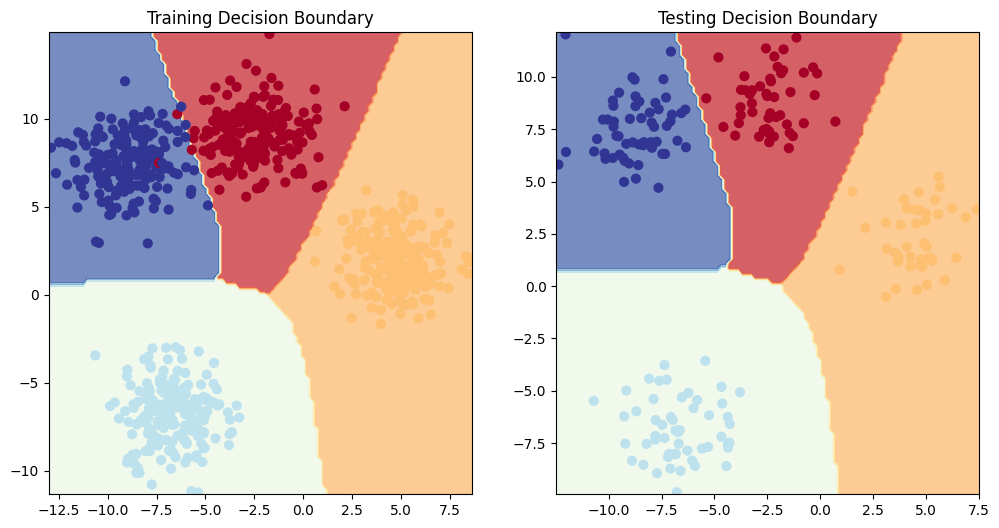

In [ ]:
# Plot training and testing decision boundaries
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Training Decision Boundary")
plot_decision_boundary(model0, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Testing Decision Boundary")
plot_decision_boundary(model0, X_test, y_test)

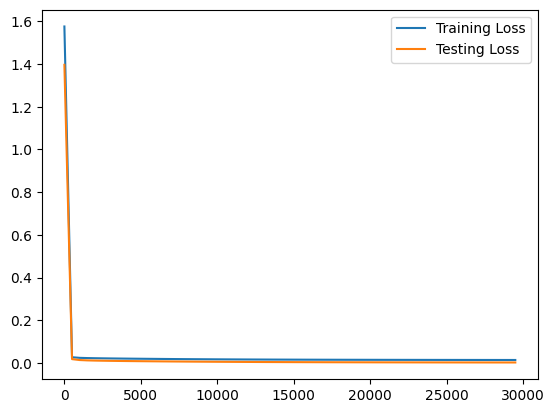

In [ ]:
# Plot training and testing losses
plt.figure()
plt.plot(epoch_num, train_losses, label='Training Loss')
plt.plot(epoch_num, test_losses, label='Testing Loss')

plt.legend()
plt.show()

In [ ]:
y_train[:10], y_train[:10].type(torch.LongTensor)

(tensor([1., 0., 2., 2., 0., 0., 0., 1., 3., 0.], device='cuda:0'),
 tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0]))

In [ ]:
# Logits - raw outputs of the model
logits = train_preds[:5]

# Prediction probabilities - softmax applied to logits (use softmax for multiclass classification instead of sigmoid)
pred_probs = torch.softmax(logits, dim=1)

# Prediction labels - index with the highest prediction probability (calculated using argmax)
pred_labels = torch.argmax(pred_probs, dim=1)

pred_labels, y_train[:5]

(tensor([1, 0, 2, 2, 0], device='cuda:0'),
 tensor([1., 0., 2., 2., 0.], device='cuda:0'))

In [ ]:
sum(pred_labels!=y_train[:5])

tensor(0, device='cuda:0')

### Multiclass Classification Model by Memory

This was done without the help of the video

In [ ]:
# Begin by generating data
N_SAMPLES = 1000
N_CLASSES = 6
SEED = 42

# Create clusters
X_blobs, y_blobs = make_blobs(n_samples=N_SAMPLES,
                              n_features=2,
                              centers=N_CLASSES,
                              cluster_std=2, random_state=SEED)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_blobs, y_blobs,
                                                    test_size=0.3,
                                                    random_state=SEED)

In [ ]:
# Create blob classificaiton model
class BlobClassifierV1(nn.Module):
  def __init__(self, in_feats, out_feats, hidden_layers=32):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Linear(in_feats, hidden_layers),
        nn.ReLU(),
        nn.Linear(hidden_layers, hidden_layers),
        nn.ReLU(),
        nn.Linear(hidden_layers, out_feats)
    )

  def forward(self, x):
    return self.layer_stack(x)

model1 = BlobClassifierV1(in_feats=2, out_feats=6)

In [ ]:
# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model1.parameters(), lr=0.01)


# Create lists to store training and testing losses & accuracies in
epoch_num = []
train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []

# Define function to calculate accuracy
def accuracy(pred_labels, true_labels):
  return sum(pred_labels != true_labels)/len(pred_labels)

In [ ]:
# Set up device agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Move loss function, data & model to GPU
X_train, y_train = torch.Tensor(X_train).to(device), torch.Tensor(y_train).to(device)
X_test, y_test = torch.Tensor(X_test).to(device), torch.Tensor(y_test).to(device)

model1 = model1.to(device)

loss_fn = loss_fn.to(device)

cuda


In [ ]:
# Create training and testing loop
num_epochs = 25001 # Train for 25001 epochs

for epoch in range(num_epochs):
  # Create training loop
  model1.train()

  train_logits = model1(X_train)
  train_pred_probs = torch.softmax(train_logits, dim=1)
  train_labels = torch.argmax(train_pred_probs, dim=1)

  train_loss = loss_fn(train_logits, y_train.type(torch.LongTensor).to(device))
  train_acc = accuracy(train_labels, y_train)

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  # Create testing loop
  model1.eval()
  with torch.inference_mode():
    test_logits = model1(X_test)
    test_pred_probs = torch.softmax(test_logits, dim=1)
    test_labels = torch.argmax(test_pred_probs, dim=1)

    test_loss = loss_fn(test_logits, y_test.type(torch.LongTensor).to(device))
    test_acc = accuracy(test_labels, y_test)

  if epoch % 100 == 0: # Append training & testing losses every 100 epochs
    epoch_num.append(epoch)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

  if epoch % 5000 == 0: # Print loss & accuracy every 5000 epochs
    print(f"Epoch: {epoch}, Training Loss: {train_loss:.2f}, Training Accuracy: {train_acc:.2f} |\
    Testing Loss: {test_loss:.2f}, Testing Accuracy: {test_acc:.2f}")



Epoch: 0, Training Loss: 1.8844454288482666, Training Accuracy: 0.868571400642395 |            Testing Loss: 1.814148187637329, Testing Accuracy: 0.8500000238418579
Epoch: 5000, Training Loss: 0.4255955219268799, Training Accuracy: 0.18571428954601288 |            Testing Loss: 0.42672982811927795, Testing Accuracy: 0.18000000715255737
Epoch: 10000, Training Loss: 0.4023961126804352, Training Accuracy: 0.18285714089870453 |            Testing Loss: 0.4112948477268219, Testing Accuracy: 0.1733333319425583
Epoch: 15000, Training Loss: 0.3964378535747528, Training Accuracy: 0.17999999225139618 |            Testing Loss: 0.4105072319507599, Testing Accuracy: 0.1733333319425583
Epoch: 20000, Training Loss: 0.3932543992996216, Training Accuracy: 0.17999999225139618 |            Testing Loss: 0.412401020526886, Testing Accuracy: 0.18000000715255737
Epoch: 25000, Training Loss: 0.3907652497291565, Training Accuracy: 0.18285714089870453 |            Testing Loss: 0.4139021635055542, Testing Acc

In [ ]:
torch.stack(train_losses[:5]).cpu().detach()

(tensor([1.8844, 0.8582, 0.6356, 0.5645, 0.5365]),
 [tensor(1.8844, device='cuda:0', grad_fn=<NllLossBackward0>),
  tensor(0.8582, device='cuda:0', grad_fn=<NllLossBackward0>),
  tensor(0.6356, device='cuda:0', grad_fn=<NllLossBackward0>),
  tensor(0.5645, device='cuda:0', grad_fn=<NllLossBackward0>),
  tensor(0.5365, device='cuda:0', grad_fn=<NllLossBackward0>)])

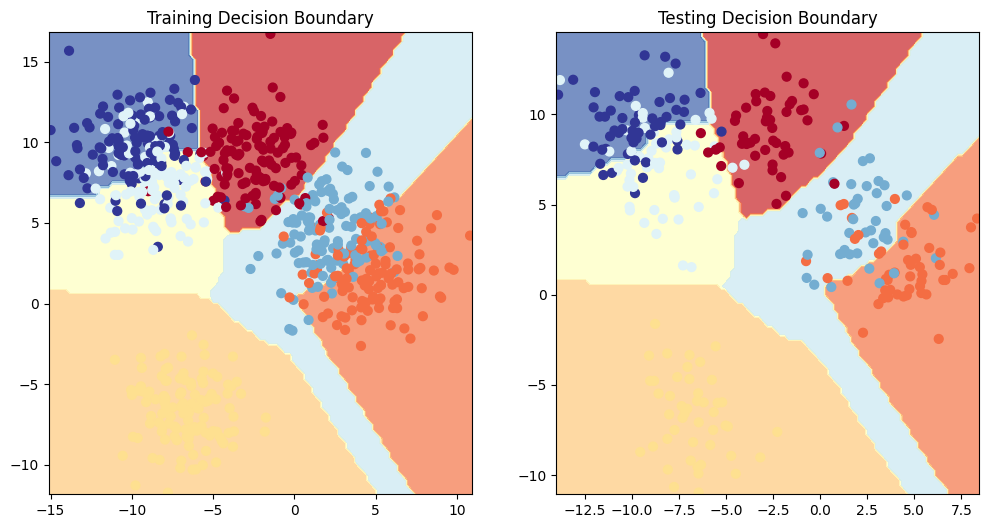

In [ ]:
# Plot decision boundaries
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Training Decision Boundary")
plot_decision_boundary(model1, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Testing Decision Boundary")
plot_decision_boundary(model1, X_test, y_test)

plt.show()

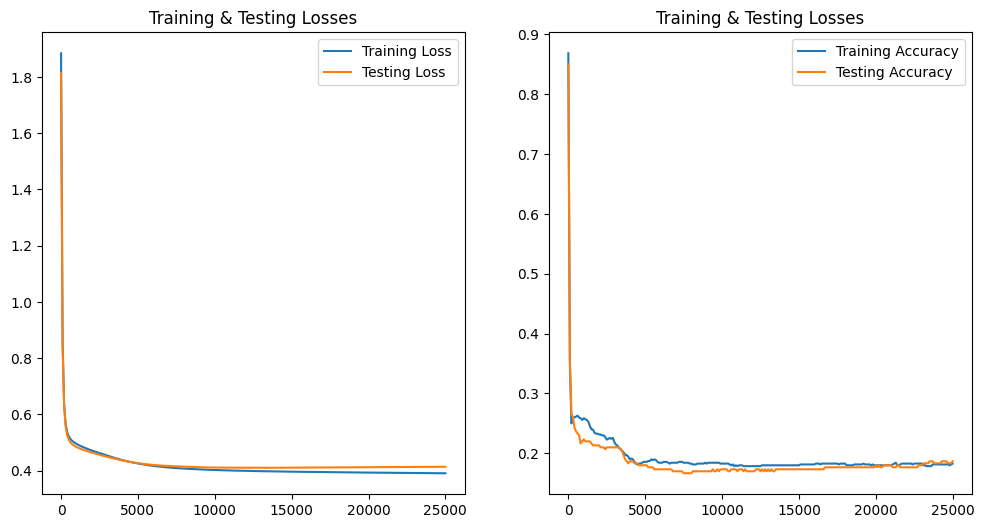

In [ ]:
# Plot Loss and Accuracies
plt.figure(figsize=(12,6))


plt.subplot(1,2,1)
plt.title("Training & Testing Losses")
plt.plot(epoch_num, torch.stack(train_losses).cpu().detach(), label="Training Loss")
plt.plot(epoch_num, torch.stack(test_losses).cpu(), label="Testing Loss")
plt.legend()

plt.subplot(1,2,2)
plt.title("Training & Testing Losses")
plt.plot(epoch_num, torch.stack(train_accuracy).cpu(), label="Training Accuracy")
plt.plot(epoch_num, torch.stack(test_accuracy).cpu(), label="Testing Accuracy")
plt.legend()

plt.show()

## Chapter 3 - PyTorch Computer Vision

In [ ]:
# Import Computer Vision Packages
import torch
import torch.nn as nn

import torchvision
from torchvision import datasets
from torchvision import transforms

import matplotlib.pyplot as plt

In [ ]:
# Generate FashionMNIST training and testing datasets
train_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    transform=transforms.ToTensor(),
    target_transform=None,
    download=True
)

test_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    transform=transforms.ToTensor(),
    target_transform=None,
    download=True
)

100%|██████████| 26421880/26421880 [00:02<00:00, 12570566.41it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 213827.29it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3730877.60it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20544507.13it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



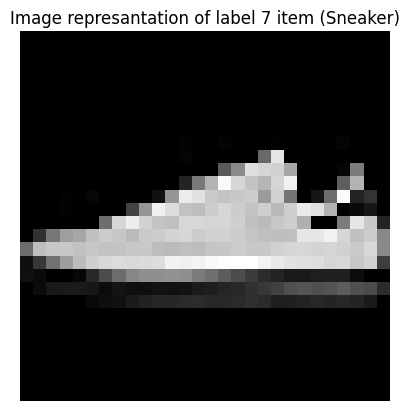

In [ ]:
# Investigate one of the training datapoints
image, label = train_data[6]
image.shape, label

# Identify the class and corresponding index of the training data points
classes = train_data.classes
train_data.class_to_idx

# Plot image of the datapoint
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Image represantation of label {label} item ({classes[label]})")
plt.axis(False)

plt.show()

In [ ]:
# Split training data into batches
from torch.utils.data import DataLoader  # Import dataloader to create batches

train_dataloader = DataLoader(train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                            batch_size=32,
                            shuffle=False)

In [ ]:
train_features, train_labels = next(iter(train_dataloader))

train_features.shape, train_labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
# Create baseline model
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape, output_shape, hidden_feats=32):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, hidden_feats),
        nn.Linear(hidden_feats, output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

MNIST_model0 = FashionMNISTModelV0(input_shape=784, output_shape=10)

In [ ]:
# Test outputs of model
torch.manual_seed(42)

output = MNIST_model0(train_features[0])
output

output_batch = MNIST_model0(train_features)
output_batch.shape

torch.Size([32, 10])

In [ ]:
# Define loss function, accuracy function, & optimizer

import torchmetrics
from torchmetrics import Accuracy
acc_fn = Accuracy(task='multiclass', num_classes=len(train_data.classes))

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(MNIST_model0.parameters(),
                            lr=0.001,
                            momentum=0.0)

# Create device agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Move model, loss & accuracy function to GPU
MNIST_model0 = MNIST_model0.to(device)

loss_fn = loss_fn.to(device)
acc_fn = acc_fn.to(device)

# Create sets in which to store training and testing loss & accuracy values
epoch_num = []
train_losses = []
test_losses = []
train_acc_vals = []
test_acc_vals = []

cuda


In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)

# Create training & testing loops
num_epochs = 5

for epoch in tqdm(range(num_epochs)):

  # Define training loop
  MNIST_model0.train()
  train_loss = 0
  train_acc = 0
  for images, labels in train_dataloader:
    images, labels = images.to(device), labels.to(device)  # Move images & labels to GPU

    outputs = MNIST_model0(images)
    pred_probs = torch.softmax(outputs, dim=1)
    pred_labels = torch.argmax(pred_probs, dim=1)

    loss = loss_fn(outputs, labels.type(torch.LongTensor).to(device))
    train_loss += loss

    accuracy = acc_fn(pred_labels, labels)
    train_acc += accuracy

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



  print(f"Epoch: {epoch}")
  print(f"Training loss: {train_loss/len(train_dataloader):.4f}, Training Accuracy: {train_acc/len(train_dataloader):.2f}")

  # Define testing loop:
  MNIST_model0.eval()
  with torch.inference_mode():
    test_loss = 0
    test_acc = 0
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)  # Move images & labels to GPU

        outputs = MNIST_model0(images)
        pred_probs = torch.softmax(outputs, dim=1)
        pred_labels = torch.argmax(pred_probs, dim=1)

        loss = loss_fn(outputs, labels.type(torch.LongTensor).to(device))
        test_loss += loss

        accuracy = acc_fn(pred_labels, labels)
        test_acc += accuracy


  #if epoch % 5000 == 0:   # Print testing loss & accuracy
  print(f"Testing loss: {test_loss/len(test_dataloader):.4f}, Testing Accuracy: {test_acc/len(test_dataloader):.2f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
Training loss: 1.7316, Training Accuracy: 0.54
Testing loss: 1.3059, Testing Accuracy: 0.65
Epoch: 1
Training loss: 1.0995, Training Accuracy: 0.67
Testing loss: 0.9747, Testing Accuracy: 0.68
Epoch: 2
Training loss: 0.8925, Training Accuracy: 0.70
Testing loss: 0.8506, Testing Accuracy: 0.70
Epoch: 3
Training loss: 0.7993, Training Accuracy: 0.73
Testing loss: 0.7834, Testing Accuracy: 0.73
Epoch: 4
Training loss: 0.7421, Training Accuracy: 0.75
Testing loss: 0.7377, Testing Accuracy: 0.75


### Make Predictions and evaluate Model 0

In [ ]:
device.type == 'cuda'

True

In [ ]:
torch.manual_seed(42)
def eval_model(model : nn.Module,
               dataloader : torch.utils.data.DataLoader,
               loss_fn, accuracy_fn):
  # Set model to evaluation mode
  model.eval()
  with torch.inference_mode():
    loss, acc = 0, 0
    for X, y in dataloader:
      # Move data to correct device if necessary
      if device.type == 'cuda':
        model = model.to(device)
        loss_fn, accuracy_fn = loss_fn.to(device), accuracy_fn.to(device)
        X, y = X.to(device), y.to(device)

      #Calculate evaluation metrics
      logits = model(X)
      loss += loss_fn(logits, y)
      acc += accuracy_fn(logits.argmax(dim=1), y)

    #Calculate Avg Loss & Accuracy
    loss /= len(dataloader)
    acc /= len(dataloader)

  return {'model_name' : model.__class__.__name__,
          'model_loss_avg' : loss.item(),
          'model_avg_acc' : acc.item()}


In [ ]:
eval_model(MNIST_model0, test_dataloader, nn.CrossEntropyLoss(), Accuracy(task='multiclass', num_classes=len(test_data.classes)))

{'model_name': 'FashionMNISTModelV0',
 'model_loss_avg': 0.7377097606658936,
 'model_avg_acc': 0.7458066940307617}

## Fashion MNIST Classifier w/ Non-Linearity

In [ ]:
### Import Necessary Packages & Libraries
import torch
import torch.nn as nn

from torch.utils.data import DataLoader
import torchvision.datasets
import torchvision.transforms as transforms


# pip install torchmetrics
from torchmetrics import Accuracy

from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Import the Fashion MNIST datasets

# Import training data
train_data = torchvision.datasets.FashionMNIST(root='data',
                                               train=True,
                                               transform=transforms.ToTensor(),
                                               target_transform=None,
                                               download=True)

# Import testing data
test_data = torchvision.datasets.FashionMNIST(root='data',
                                              train=False,
                                              transform=transforms.ToTensor(),
                                              target_transform=None,
                                              download=True)

100%|██████████| 26421880/26421880 [00:02<00:00, 10473536.13it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 205894.83it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3723544.93it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6072068.90it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
### Create a classification model with non-linear functions
class FashinMNISTModelV1(nn.Module):
  def __init__(self, input_shape, output_shape, hidden_nodes=32):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, int(0.5*hidden_nodes)),
        nn.ReLU(),
        nn.Linear(int(0.5*hidden_nodes), hidden_nodes),
        nn.ReLU(),
        nn.Linear(hidden_nodes, int(0.5*hidden_nodes)),
        nn.ReLU(),
        nn.Linear(int(0.5*hidden_nodes), output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

Fashion_model1 = FashinMNISTModelV1(input_shape=28*28,
                                    output_shape=10)

In [ ]:
# Create training DataLoader
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)

test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define loss function, accuracy function & optimizer
loss_fn = nn.CrossEntropyLoss()
accuracy_fn = Accuracy(task='multiclass', num_classes = len(train_data.classes))

optimizer = torch.optim.SGD(Fashion_model1.parameters(),
                            lr=0.01)

In [ ]:
# Create Device Agnostic Code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

if device.type == 'cuda':
  loss_fn, accuracy_fn = loss_fn.to(device), accuracy_fn.to(device)
  Fashion_model1 = Fashion_model1.to(device)
  print(f"Succesfully moved Loss function, Accuracy function & model to {device}")

cuda
Succesfully moved Loss function, Accuracy function & model to cuda


In [ ]:
### Create function for training loop

def train_loop(model:nn.Module,
               dataloader:DataLoader,
               optimizer:torch.optim,
               loss_fn, accuracy_fn, device):
  # Set model to training mode
  model.train()
  loss, acc = 0, 0
  for X, y in dataloader: # Loop through dataloader batches
    X, y = X.to(device), y.to(device)   # Move data to device

    logits = model(X)
    batch_loss = loss_fn(logits, y)
    batch_acc = accuracy_fn(logits.argmax(dim=1), y)

    # Carry out backpropagation & parameter updates
    optimizer.zero_grad()
    batch_loss.backward()
    optimizer.step()

    # Update loss & accuracy
    loss += batch_loss
    acc += batch_acc

  loss /= len(dataloader)
  acc /= len(dataloader)

  return {'model_name' : model.__class__.__name__,
          'avg_train_loss' : loss,
          'avg_train_acc' : acc}


### Create function for evaluation loop

def eval_loop(model:nn.Module,
               dataloader:DataLoader,
               loss_fn, accuracy_fn, device):
  # Set model to training mode
  model.eval()
  with torch.inference_mode():
    loss, acc = 0, 0
    for X, y in dataloader: # Loop through dataloader batches
      X, y = X.to(device), y.to(device)   # Move data to device

      logits = model(X)
      loss += loss_fn(logits, y)
      acc += accuracy_fn(logits.argmax(dim=1), y)

    loss /= len(dataloader)
    acc /= len(dataloader)

  return {'model_name' : model.__class__.__name__,
          'avg_test_loss' : loss,
          'avg_test_acc' : acc}

In [ ]:
### Create sets for storing the training & testing loss and accuracy values
epoch_num = []
train_losses, train_accs = [], []
test_losses, test_accs = [], []

In [ ]:
### Train & Evaluate the model
num_epochs = 100

for epoch in tqdm(range(num_epochs, 4*num_epochs)):
  train_results = train_loop(Fashion_model1, train_dataloader, optimizer,
                             loss_fn, accuracy_fn, device)
  print(f"Epoch: {epoch}, \nTraining Loss: {train_results['avg_train_loss']:.4f}, Training Accuracy: {train_results['avg_train_acc']:.2f}")

  eval_results = eval_loop(Fashion_model1, test_dataloader,
                           loss_fn, accuracy_fn, device)
  print(f"Testing Loss: {eval_results['avg_test_loss']:.4f}, Testing Accuracy: {eval_results['avg_test_acc']:.2f}")

  # Add results to list of resutls
  epoch_num.append(epoch)
  train_losses.append(train_results['avg_train_loss']), train_accs.append(train_results['avg_train_acc'])
  test_losses.append(eval_results['avg_test_loss']), test_accs.append(eval_results['avg_test_acc'])

  0%|          | 0/300 [00:00<?, ?it/s]

Epoch: 100, 
Training Loss: 1.4818, Training Accuracy: 0.43
Testing Loss: 0.7996, Testing Accuracy: 0.70
Epoch: 101, 
Training Loss: 0.6867, Training Accuracy: 0.75
Testing Loss: 0.6042, Testing Accuracy: 0.79
Epoch: 102, 
Training Loss: 0.5704, Training Accuracy: 0.80
Testing Loss: 0.6124, Testing Accuracy: 0.77
Epoch: 103, 
Training Loss: 0.5184, Training Accuracy: 0.82
Testing Loss: 0.5283, Testing Accuracy: 0.81
Epoch: 104, 
Training Loss: 0.4849, Training Accuracy: 0.83
Testing Loss: 0.5354, Testing Accuracy: 0.80
Epoch: 105, 
Training Loss: 0.4622, Training Accuracy: 0.84
Testing Loss: 0.4772, Testing Accuracy: 0.83
Epoch: 106, 
Training Loss: 0.4449, Training Accuracy: 0.84
Testing Loss: 0.5079, Testing Accuracy: 0.81
Epoch: 107, 
Training Loss: 0.4298, Training Accuracy: 0.85
Testing Loss: 0.4445, Testing Accuracy: 0.84
Epoch: 108, 
Training Loss: 0.4179, Training Accuracy: 0.85
Testing Loss: 0.4474, Testing Accuracy: 0.84
Epoch: 109, 
Training Loss: 0.4073, Training Accuracy: 

KeyboardInterrupt: 

## Building a CNN

In [ ]:
# Install torchmetrics and mlxtend packages
#pip install torchmetrics
#pip install torchmetrics -U mlxtend

In [ ]:
# Import the main libraries & packages
import torch
import torch.nn as nn

#import torchmetrics
#from torchmetrics import Accuracy
import torch.optim as optim
from torch.utils.data import DataLoader

from tqdm.auto import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Import Fashion MNIST training and testing data
from torchvision.datasets import FashionMNIST
from torchvision import transforms

train_data = FashionMNIST(root='data',
                          train=True,
                          transform=transforms.ToTensor(),
                          target_transform=None,
                          download=True)

test_data = FashionMNIST(root='data',
                          train=False,
                          transform=transforms.ToTensor(),
                          target_transform=None,
                          download=True)

100%|██████████| 26421880/26421880 [00:11<00:00, 2213991.22it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 220410.50it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:03<00:00, 1428656.83it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 24761785.54it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
# Create CNN Class
class FashinMNIST_CNN_V0(nn.Module):
  def __init__(self, input_shape, output_shape, hidden_units=10):
    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units,
                  kernel_size= 2, stride= 1, padding= 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                  kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                  kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                  kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )


  def forward(self, x):
    x = self.conv_block1(x)
    #print(x.shape)
    x=self.conv_block2(x)
    #print(x.shape)
    return self.classifier_layer(x)

In [ ]:
# Check if CNN model outputs results correctly
image, label = train_data[0]
image.shape

# Instantiate an instance of the CNN model
cnn_model0 = FashinMNIST_CNN_V0(input_shape=1, output_shape=10)

# Pass image through cnn model
cnn_output = cnn_model0(image.unsqueeze(0))
cnn_output

tensor([[-0.0764, -0.0433,  0.0319,  0.0275,  0.0622,  0.0551, -0.0020, -0.0020,
          0.0361, -0.1026]], grad_fn=<AddmmBackward0>)

### Training & Evaluating the CNN Model

In [ ]:
# Setup Device Agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Define Loss & Accuracy functions -- Ensure torchmetrics hsas been installed

from torchmetrics import Accuracy

loss_fn = nn.CrossEntropyLoss()
acc_fn = Accuracy(task='multiclass', num_classes = len(train_data.classes))

# Move accuracy function, loss function, and mode to GPU
acc_fn, loss_fn = acc_fn.to(device), loss_fn.to(device)
cnn_model0 = cnn_model0.to(device)

# Define optimizer
optimizer = torch.optim.SGD(cnn_model0.parameters(), lr=0.01)

cuda


ModuleNotFoundError: No module named 'torchmetrics'

In [ ]:
# Create training and testing dataloaders
train_dataloader = DataLoader(train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=32,
                             shuffle=False)

In [ ]:
# Define testing loop function
def train_loop(model:nn.Module,
              dataloader:DataLoader,
              loss_fn, acc_fn, optimizer, device):

  model.train()  # Set model to training mode
  batch_loss, batch_acc = 0, 0  # Initiate batch loss & accuracy

  # Loop through batches for training
  for images, labels in dataloader:
    images, labels = images.to(device), labels.to(device)   # Move images & labels to correct device

    batch_logits = model(images)  # Carry out forward pass for batch
    loss = loss_fn(batch_logits, labels)   # Calculate batch loss
    acc = acc_fn(batch_logits, labels)  # Calculate batch accuracy

    batch_loss += loss
    batch_acc += acc

    # Model training
    optimizer.zero_grad()   # Zero the gradient for the optimizer
    loss.backward()    # Carry out backpropagation for the batch
    optimizer.step()   # Update the model weights

  epoch_loss = batch_loss/len(dataloader)    # Calculate the average batch loss over the dataloader
  epoch_acc = batch_acc/len(dataloader)    # Calculate the average batch accuracy over the dataloader

  return {'train_loss' : epoch_loss,
          'train_acc' : epoch_acc}


# Define evaluation loop function

def test_loop(model:nn.Module,
              dataloader:DataLoader,
              loss_fn, acc_fn, device):

  batch_loss, batch_acc = 0, 0  # Initiate batch loss & accuracy
  model.eval()  # Set model to training mode
  with torch.inference_mode():
    # Loop through batches for training
    for images, labels in dataloader:
      images, labels = images.to(device), labels.to(device)   # Move images & labels to correct device

      batch_logits = model(images)  # Carry out forward pass for batch
      loss = loss_fn(batch_logits, labels)   # Calculate batch loss
      acc = acc_fn(batch_logits, labels)  # Calculate batch accuracy

      batch_loss += loss
      batch_acc += acc

  epoch_loss = batch_loss/len(dataloader)    # Calculate the average batch loss over the dataloader
  epoch_acc = batch_acc/len(dataloader)    # Calculate the average batch accuracy over the dataloader

  return {'test_loss' : epoch_loss,
          'test_acc' : epoch_acc}

In [ ]:
### Carry out model training and evaluation
from tqdm.auto import tqdm

# Define number of epoch to train model for
num_epochs = 10

# Create lists to store training & evaluation results
epochs = []
train_accs, test_accs = [], []
train_losses, test_losses = [], []

for epoch in tqdm(range(num_epochs)):

  # Calculate training and testing results
  train_results = train_loop(cnn_model0, train_dataloader, loss_fn, acc_fn, optimizer, device)
  test_results = test_loop(cnn_model0, train_dataloader, loss_fn, acc_fn, device)

  # Print epoch results
  print(f"Epoch : {epoch} \nTraining Loss : {train_results['train_loss']}, Training Accuracy : {train_results['train_acc']} \
  | Testing Loss : {test_results['test_loss']}, Testing Accuracy : {test_results['test_acc']}")

  # Add results to lists of results
  epochs.append(epoch)
  train_accs.append(train_results['train_acc']), test_accs.append(test_results['test_acc'])
  train_losses.append(train_results['train_loss']), test_losses.append(test_results['test_loss'])

In [ ]:
# Plot Results
plt.figure(figsize=(12,6))

# Plot Losses
plt.subplot(1,2,1)
plt.plot(epochs, torch.stack(train_losses).detach().cpu().tolist(), label='Training Loss')
plt.plot(epochs, torch.stack(test_losses).cpu().tolist(), label='Testing Loss')

# Plot Accuracies
plt.subplot(1,2,2)
plt.plot(epochs, torch.stack(train_losses).detach().cpu().tolist(), label='Training Loss')
plt.plot(epochs, torch.stack(test_losses).cpu().tolist(), label='Testing Loss')

plt.legend()
plt.show()

### Make Prediction on a Random Sample fo the Testing Dataset

In [ ]:
# Generate random indices
import random

plt.figure(figsize=(15,6))

for i in range(6):

  # Generate random image from testing data
  rand_index = random.randint(0,len(test_data))
  image, label = test_data[rand_index]

  # Make prediction
  cnn_model0.eval()
  with torch.inference_mode():
    label_pred = cnn_model0(image.to(device).unsqueeze(0)).argmax(dim=1).item()

  # Plot predicted image and predicted value
  plt.subplot(2,3,i+1)
  plt.imshow(image.squeeze(), cmap="gray")
  if test_data.classes[label] == test_data.classes[label_pred]:
    plt.title(f"True Label : {test_data.classes[label]}, Predicted Label : {test_data.classes[label_pred]}", c='g')
  else:
    plt.title(f"True Label : {test_data.classes[label]}, Predicted Label : {test_data.classes[label_pred]}", c='r')

plt.tight_layout()
plt.show()

### Creating & Plotting Confusion Matrix with MLXtend adn torchmetrics

In [ ]:
# Define a 1 dim tensor containing all label predictions for the entire test dataloader
y_preds = []

cnn_model0.eval()
with torch.inference_mode():
  for images, labels in tqdm(test_dataloader):
    images, labels = images.to(device), labels.to(device)

    y_logits = cnn_model0(images)
    y_pred_labels = torch.softmax(y_logits, dim=1).argmax(dim=1)

    y_preds.append(y_pred_labels.cpu())

y_pred_tensor = torch.cat(y_preds)

In [ ]:
# Import torchmetrics & ML Xtend
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Set up an instance of the confusion matrix and compare predicions to target
confmat = ConfusionMatrix(task='multiclass', num_classes=len(test_data.classes))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

In [ ]:
# Plot Confusion Matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=test_data.classes,
                                figsize=(10,7))

plt.show()

### Save & Load Best Performing Model

In [ ]:
## Save the Model
from pathlib import Path

# Create Directory in which to save Model State Dictionaries
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


MODEL_NAME = "cnn_fashion_MNIST_model_tinyVGG.pth" # Assign Model a Name
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME  # Define Path in which to save model


# Save the Model State Dict
print(f"Saving {cnn_model0.__class__.__name__} to {MODEL_SAVE_PATH}")
torch.save(obj=cnn_model0.state_dict(),
           f=MODEL_SAVE_PATH)
 # ls -l models/cnn_fashion_MNIST_model_tinyVGG.pth   # Check model save path

In [ ]:
## Load the model
tinyVGG_FashionMNIST = FashinMNIST_CNN_V0(input_shape=1,
                                          output_shape=len(test_data.classes),
                                          hidden_units=10)

tinyVGG_FashionMNIST.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to target device
tinyVGG_FashionMNIST.to(device)

In [ ]:
## Evaluate the loaded model
cnn_model0_results = test_loop(cnn_model0, test_dataloader,
                               loss_fn, acc_fn, device)

loaded_model_results = test_loop(tinyVGG_FashionMNIST, test_dataloader,
                                 loss_fn, acc_fn, device)

In [ ]:
print(cnn_model0_results), print(loaded_model_results)

### Reproduce all the above from memory

In [ ]:
# Import all the necessary libraries & packages
import torch
import torch.nn as nn


from torch.utils.data import DataLoader
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
import torchmetrics
import mlxtend

from tqdm.auto import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Import the training and testing datasets
train_data = FashionMNIST(root='data',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

test_data = FashionMNIST(root='data',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

100%|██████████| 26421880/26421880 [00:02<00:00, 11972679.58it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 202842.67it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3773562.36it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6123731.42it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
# Create TinyVGG Computer Vision NN Architecture

class TinyVGG_NN(nn.Module):
  def __init__(self, input_shape, output_shape, hidden_layers=10):
    super().__init__()

    # Define first convolutional layer
    self.conv_layer1 = nn.Sequential(
                                    nn.Conv2d(input_shape, hidden_layers,
                                              kernel_size=2, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.Conv2d(hidden_layers, hidden_layers,
                                              kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2)
                                    )

    # Define second convolutional layer
    self.conv_layer2 = nn.Sequential(
                                    nn.Conv2d(hidden_layers, hidden_layers,
                                              kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.Conv2d(hidden_layers, hidden_layers,
                                              kernel_size=3, stride=1, padding=1),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2)
                                    )

    # Define output layer
    self.output_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(hidden_layers*7*7, output_shape)
    )

  def forward(self, x):
    x = self.conv_layer1(x)
    #print(x.shape)
    x=self.conv_layer2(x)
    #print(x.shape)
    return self.output_layer(x)

# Create instance of the model
tinyVGG_model1 = TinyVGG_NN(input_shape=1,output_shape=len(train_data.classes))

In [ ]:
## Test output of the model
sample_img, sample_label = train_data[0]
sample_output = tinyVGG_model1(sample_img.unsqueeze(0))
sample_output

tensor([[ 0.0026,  0.0064,  0.0323, -0.0180,  0.0459, -0.0113, -0.0194, -0.0020,
         -0.0343,  0.0382]], grad_fn=<AddmmBackward0>)

In [ ]:
# Define optimizer, loss function, accuracy function
optimizer = torch.optim.SGD(tinyVGG_model1.parameters(),
                            lr=0.01)

loss_fn = nn.CrossEntropyLoss()

acc_fn = torchmetrics.Accuracy(task='multiclass', num_classes=len(train_data.classes))

# Create training and testing set dataloaders
train_dataloader = DataLoader(train_data,
                              batch_size=32, shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=32, shuffle=False)

# Define device agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Move tinyVGG_model1, loss_fn, acc_fn to GPU
tinyVGG_model1 = tinyVGG_model1.to(device)
loss_fn, acc_fn = loss_fn.to(device), acc_fn.to(device)

cuda


In [ ]:
# Define training and evaluation loop functions for one epoch
def train_loop(model, dataloader,
               loss_fn, acc_fn, optimizer, device):
  # Initiate loss and accuracy scores
  epoch_loss, epoch_acc = 0.0, 0.0

  # Define training loop
  model.train()
  for images, labels in dataloader:
    images, labels = images.to(device), labels.to(device)

    logits = model(images) # Carry out forward propagation
    pred_labels = logits.argmax(dim=1) # Calculate predicted labels

    batch_loss = loss_fn(logits, labels)

    epoch_loss += batch_loss   # Add batch loss to overall epoch loss
    epoch_acc += acc_fn(logits, labels)    # Add batch accuracy to overall epoch accuracy

    # Train the model
    optimizer.zero_grad()  # Set optimizer gradient to zero
    batch_loss.backward()   # Carry out backpropagation
    optimizer.step()  # Update model parameters

  epoch_loss /= len(dataloader)
  epoch_acc /= len(dataloader)

  return {'model_name' : model.__class__.__name__,
          'training_accuracy' : epoch_acc,
          'training_loss' : epoch_loss}

def eval_loop(model, dataloader,
              loss_fn, acc_fn, device):
  # Initiate loss and accuracy scores
  epoch_loss, epoch_acc = 0.0, 0.0

  # Define evaluation loop
  model.eval()
  with torch.inference_mode():
    for images, labels in dataloader:
      images, labels = images.to(device), labels.to(device)

      logits = model(images) # Carry out forward propagation
      pred_labels = logits.argmax(dim=1) # Calculate predicted labels

      epoch_loss += loss_fn(logits, labels)   # Add batch loss to overall epoch loss
      epoch_acc += acc_fn(logits, labels)    # Add batch accuracy to overall epoch accuracy

    epoch_loss /= len(dataloader)
    epoch_acc /= len(dataloader)

  return {'model_name' : model.__class__.__name__,
          'testing_accuracy' : epoch_acc,
          'testing_loss' : epoch_loss}

In [ ]:
### Carry out model training and evaluation
num_epochs = 10

epochs = []
train_losses, test_losses = [], []
train_accs, test_accs = [], []

for epoch in tqdm(range(num_epochs)):
  train_results = train_loop(tinyVGG_model1, train_dataloader,
                             loss_fn, acc_fn, optimizer, device)
  test_results = eval_loop(tinyVGG_model1, test_dataloader,
                           loss_fn, acc_fn, device)

  # Print Epoch Results
  print(f"Epoch: {epoch} \
  \nTraining Loss : {train_results['training_loss'].item()}, Training Accuracy : {train_results['training_accuracy'].item()} \
  \nTesting Loss : {test_results['testing_loss'].item()}, Testing Accuracy : {test_results['testing_accuracy'].item()}")

  # Append epoch results to results lists
  epochs.append(epoch)

  train_losses.append(train_results['training_loss'].item())
  test_losses.append(test_results['testing_loss'].item())

  train_accs.append(train_results['training_accuracy'].item())
  test_accs.append(test_results['testing_accuracy'].item())

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0   
Training Loss : 1.3030234575271606, Training Accuracy : 0.5339666604995728   
Testing Loss : 0.6520146727561951, Testing Accuracy : 0.7675718665122986
Epoch: 1   
Training Loss : 0.5460741519927979, Training Accuracy : 0.7994833588600159   
Testing Loss : 0.4971482455730438, Testing Accuracy : 0.824680507183075
Epoch: 2   
Training Loss : 0.45492005348205566, Training Accuracy : 0.8358666896820068   
Testing Loss : 0.4420514404773712, Testing Accuracy : 0.8425518870353699
Epoch: 3   
Training Loss : 0.4116832911968231, Training Accuracy : 0.8516166806221008   
Testing Loss : 0.4188522398471832, Testing Accuracy : 0.8470447063446045
Epoch: 4   
Training Loss : 0.3840350806713104, Training Accuracy : 0.8606166839599609   
Testing Loss : 0.3835058808326721, Testing Accuracy : 0.8621205687522888
Epoch: 5   
Training Loss : 0.36262065172195435, Training Accuracy : 0.8695499897003174   
Testing Loss : 0.3739054799079895, Testing Accuracy : 0.8693090677261353
Epoch: 6   
Training 

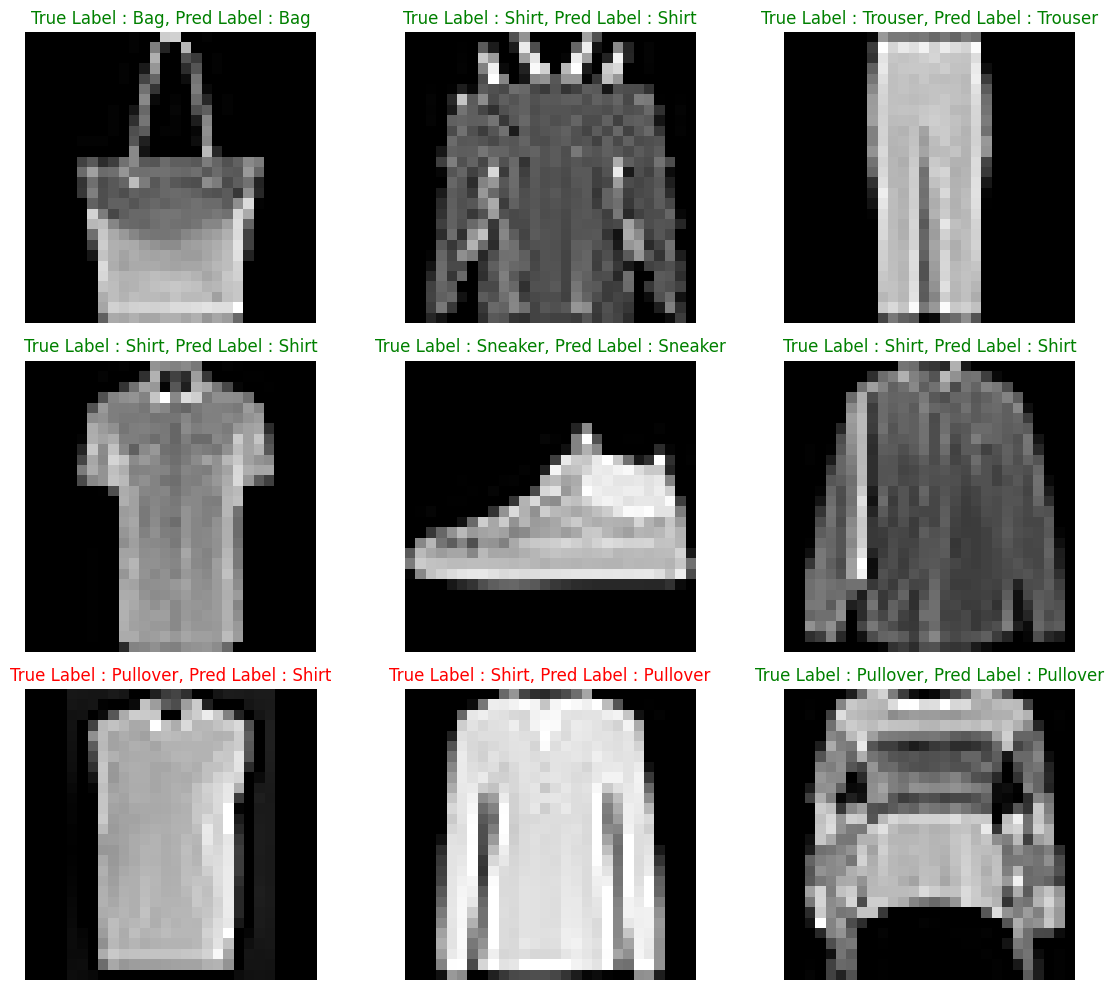

In [ ]:
# Plot Results
rand_idx = np.random.randint(low=0, high=len(test_data), size=9)

plt.figure(figsize=(12,10))
for i in range(len(rand_idx)):
  img, label = test_data[rand_idx[i]]
  pred_label = tinyVGG_model1(img.to(device).unsqueeze(0)).argmax(dim=1)

  plt.subplot(3,3,i+1)
  plt.imshow(img.cpu().squeeze(),cmap='gray')
  if label == pred_label:
    plt.title(f"True Label : {test_data.classes[label]}, Pred Label : {test_data.classes[pred_label.item()]}", c='g')
  else:
    plt.title(f"True Label : {test_data.classes[label]}, Pred Label : {test_data.classes[pred_label.item()]}", c='r')

  plt.axis(False)

plt.tight_layout()
plt.show()

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task='multiclass', num_classes=len(test_data.classes))

pred_labels = []
tinyVGG_model1.eval()
with torch.inference_mode():
  for images, labels in tqdm(test_dataloader):
    pred_label = tinyVGG_model1(images.to(device)).argmax(dim=1)
    pred_labels.append(pred_label.cpu())


  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
conf_mat = confmat(torch.cat(pred_labels), test_data.targets)

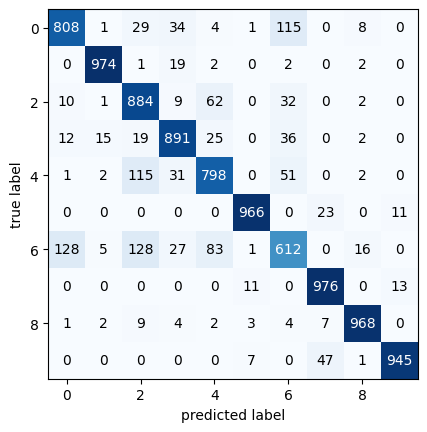

In [ ]:
plot_confusion_matrix(conf_mat.numpy())
plt.show()

## Creating Custom Datasets

In [2]:
# Import PyTorch and set up device agnostic code
import torch
import torch.nn as nn

from torch.utils.data import DataLoader
from torch.utils.data import Dataset

import torchvision
import torchvision.transforms as transforms



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


### Get Custom Data

In [3]:
### Import subset of Food101 torchvision dataset
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
DATA_PATH = Path('data/')
IMG_PATH = DATA_PATH / "pizza_steak_sushi"
if IMG_PATH.is_dir():
  print(f"Directory {IMG_PATH} already exists - skipping download")
else:
  print(f"{IMG_PATH} does not exist - creating directory")
  IMG_PATH.mkdir(parents=True, exist_ok=True)


data/pizza_steak_sushi does not exist - creating directory


In [4]:
# Download Pizza, Steak and Sushi Data
with open(DATA_PATH / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading sushi, steak, pizza image data...")
  f.write(request.content)

# Unzip pizza, sushi, steak file
with zipfile.ZipFile(DATA_PATH / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data")
  zip_ref.extractall(IMG_PATH)

Unzipping pizza, steak and sushi data


### Data Preparation & Exploration

In [5]:
import os
def walk_through_dir(dir_path):
  """ Walks through dir_path returning file names"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")


In [6]:
walk_through_dir(IMG_PATH)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'


In [7]:
# Setup training and testing paths
train_dir = IMG_PATH / "train"
test_dir = IMG_PATH / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [8]:
IMG_PATH

PosixPath('data/pizza_steak_sushi')

Random Image Path: data/pizza_steak_sushi/test/steak/673127.jpg
Class of Random Image: steak
Image Height = 512, Image Width = 512


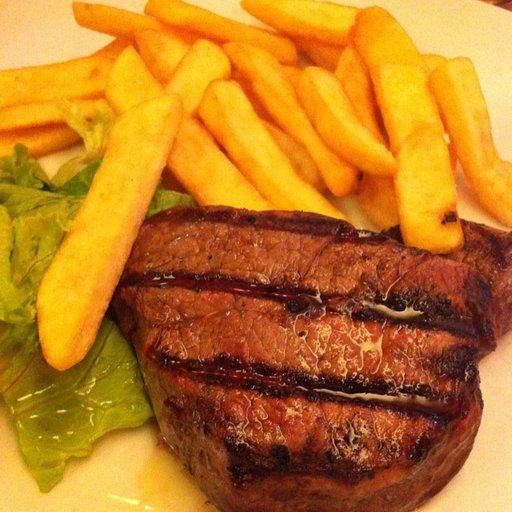

In [9]:
### Visualizing an Image
import random
from PIL import Image

# Set Seed
random.seed(42)

# 1. Get all image paths
img_path_list = list(IMG_PATH.glob("*/*/*.jpg"))

# 2. Pick a random image path
rand_img_path = random.choice(img_path_list)
print(f"Random Image Path: {rand_img_path}")

# 3. Get image class
img_class = rand_img_path.parent.stem
print(f"Class of Random Image: {img_class}")

# 4. Open image
img = Image.open(rand_img_path)
print(f"Image Height = {img.height}, Image Width = {img.width}")
img



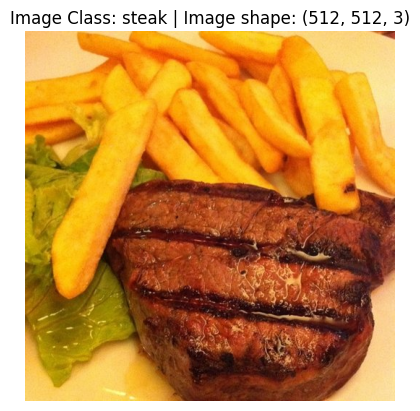

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Turn image into numpy array
img_as_array = np.asarray(img)

# Plot image
plt.imshow(img)
plt.title(f"Image Class: {rand_img_path.parent.stem} | Image shape: {img_as_array.shape}")
plt.axis(False)
plt.show()

In [11]:
### Transforming data
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

# Create image transformer
data_transform = transforms.Compose([
    # Resize Image to 64*64
    transforms.Resize(size=(64,64)),
    # Horizontally flip 50% of images passed through the transformer
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn image into a torch tensor
    transforms.ToTensor()
])

In [12]:
def plot_transformed_image(image_paths, transformer, n=3, seed=None):
  # Set random seed if it has been specified
  if seed != None:
    random.seed(seed)

  # Randomly select n images from image_paths to transform & plot

  plt.figure(figsize=(12,10))

  for i in range(n):
    img_path = random.choice(image_paths)

    PIL_img = Image.open(img_path)
    transformed_img = transformer(PIL_img).permute(1,2,0)

    plt.subplot(n, 2, 2*i+1)
    plt.imshow(PIL_img)
    plt.title(f"Image Class : {img_path.parent.stem}, HxWxC : {[PIL_img.height, PIL_img.width, len(PIL_img.mode)]}")
    plt.axis(False)

    plt.subplot(n, 2, 2*i+2)
    plt.imshow(transformed_img)
    plt.title(f"Image Class : {img_path.parent.stem}, HxWxC : {transformed_img.shape}")
    plt.axis("Off")

  plt.show()

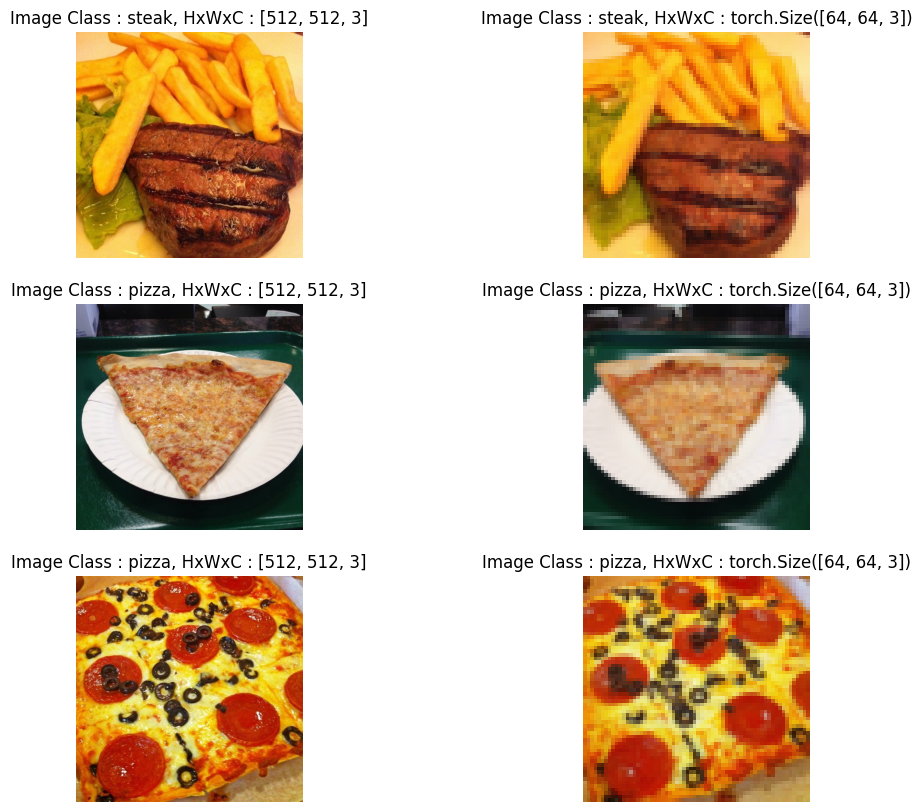

In [13]:
plot_transformed_image(img_path_list, data_transform, seed=42)

### Loading Image Data using ImageFolder

We can load image classification data using torchvision.datasets.ImageFolder

In [14]:
# Use ImageFolder to create Dataset
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # transform for the data
                                  target_transform=None)   # transform for the labels

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

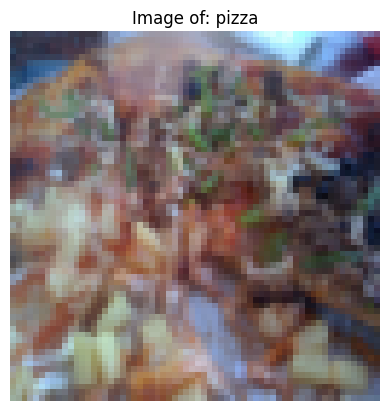

In [15]:
# Define Class Names
class_names = train_data.classes


# Generate random image & Label from training data

#random.seed(42)
rand_idx = random.randint(0,225)
img, label = train_data[rand_idx][0], train_data[rand_idx][1]

# Plot randomly generated image
plt.imshow(img.permute(1,2,0))
plt.title(f"Image of: {class_names[label]}")

plt.axis(False)
plt.show()

In [16]:
# Define training & testing dataloaders
from torch.utils.data import DataLoader
BATCH_SIZE = 8

train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=1)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE)

### Creating a custom `Dataset`

1. Want to be able to load images from file
2. Want to be able to get class names from Dataset
3. Want to be able to get classes as a dictionary from Dataset

Pros:
* Can create a `Dataset` out of almost anything
* Not limited to PyTorch's prebuilt `dataset` functions

Cons:
* Custom Dataset may not actually work correctly
* Using a custom dataset requries us to write more code which could be prone to errors

Custom Datasets in PyTorch often subclass `torch.utils.data.Dataset`

In [17]:
# Import necessary libraries to create custom dataset
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset

from torchvision import transforms
from typing import Tuple, Dict, List

In [18]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [19]:
### Create helper function to get class names

# Setup path directory
target_dir = 'train'
IMG_PATH = Path('data/pizza_steak_sushi')

# Define funciton that finds classes
def find_classes(directory:str) -> Tuple[List[str], Dict[str,int]]:
  # 1.1 Get class anmes by scanning target directory
  class_names = sorted([entry.name for entry in list(os.scandir(directory)) if entry.is_dir()])

  # 1.2 Raise error if classes could not be found
  if not class_names:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}... Check file structure")

  # 2.1 Create dictionary of index labels
  class_to_idx = {class_name : i for i, class_name in enumerate(class_names)}

  return class_names, class_to_idx

# Test the function
find_classes(IMG_PATH/target_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [20]:
### Create a custom `Dataset` to replicate `ImageFolder`
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  def __init__(self, target_dir : str, transform=None):

    # Create Class attributes
    self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(target_dir)

  # Create function to load images
  def load_image(self, index:int) -> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)

  # Overwrite __len__()
  def __len__(self) -> int:
    return len(self.paths)

  # Overwrite __getitem__()
  def __getitem__(self, idx:int) -> Tuple[torch.Tensor, int]:

    img = self.load_image(idx)
    class_name = self.paths[idx].parent.name
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx

In [21]:
# Create training and testing data transformers
train_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

# Test custom dataset class
train_data_custom = ImageFolderCustom(target_dir = IMG_PATH/'train',
                                      transform = train_transform)

test_data_custom = ImageFolderCustom(target_dir = IMG_PATH/'test',
                                      transform = test_transform)

# Check for differences
len(train_data), len(train_data_custom), len(test_data), len(test_data_custom)

train_data_custom.classes, train_data_custom.class_to_idx

print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


In [22]:
# create a function to display random images
def random_images(dataset : torch.utils.data.Dataset,
                  classes=None, n_images: int=10, display_shape : bool=True, seed: int=None):
  # Set seed if it has been specified
  if seed:
    random.seed(seed)

  # Limit number of images shown to 10
  if n_images > 10:
    n_images = 10
    display_shape=False
    print(f"For display purposes `n_images` should not be larger than 10, setting to 10 and removing shape display.")

  # generate 10 random sample images to plot
  indices = random.sample(range(len(dataset)), k=n_images)

  # Setup up matplotlib plot
  plt.figure(figsize=(16,8))

  # Loop through random indices and plot them
  for i, sample_idx in enumerate(indices):
    image, label = dataset[sample_idx]

    image = image.permute(1,2,0)

    # Plot image
    plt.subplot(1,n_images,i+1)
    plt.imshow(image)
    plt.axis(False)

    # Create title
    title=None
    if classes:
      title = f"Class : {classes[label]}"
      if display_shape:
        title = title + f"\nShape : {image.shape}"

    plt.title(title)
    plt.tight_layout()


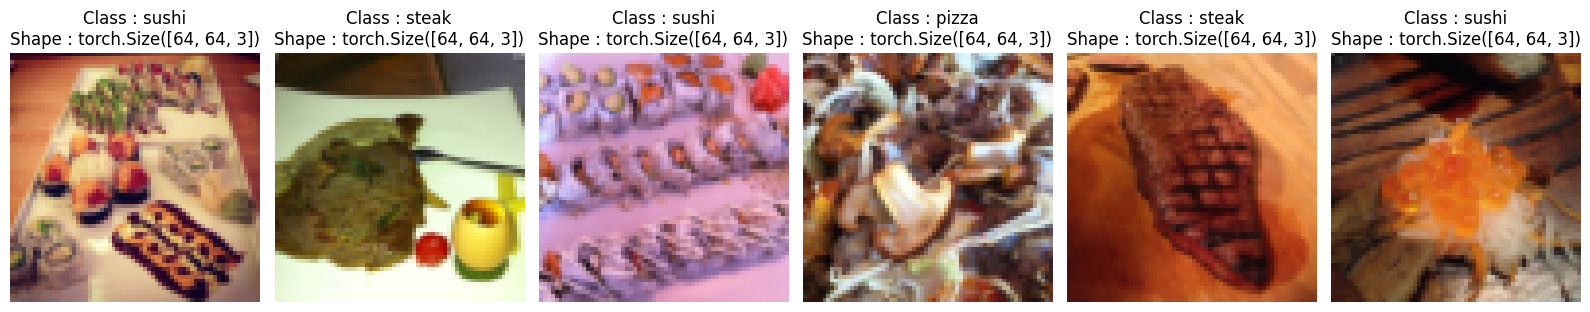

In [23]:
random_images(train_data,
              classes=train_data.classes,
              n_images=6,
              seed=6)

In [24]:
# Turn custom datasets into dataloaders
BATCH_SIZE=8
NUM_WORKERS=0

train_dataloader_custom = DataLoader(train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)
test_dataloader_custom = DataLoader(test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

# Inspect elements of dataloader
train_img_custom, train_label_custom = next(iter(train_dataloader_custom))
test_img_custom, test_label_custom = next(iter(test_dataloader_custom))

print(f"Train Image Shape : {train_img_custom.shape}, Train Image Label : {train_label_custom}")
print(f"Test Image Shape : {test_img_custom.shape}, Test Image Label : {test_label_custom}")

Train Image Shape : torch.Size([8, 3, 64, 64]), Train Image Label : tensor([0, 1, 2, 2, 2, 1, 2, 0])
Test Image Shape : torch.Size([8, 3, 64, 64]), Test Image Label : tensor([0, 0, 0, 0, 0, 0, 0, 0])


## Data Augmentation

Data augmentation refers to the process of artificially adding diversity to the training data.

In the case of image data, this may mean applying various transformations to the training images.

Possible transformations include: rotations, zooms, shifts, etc.

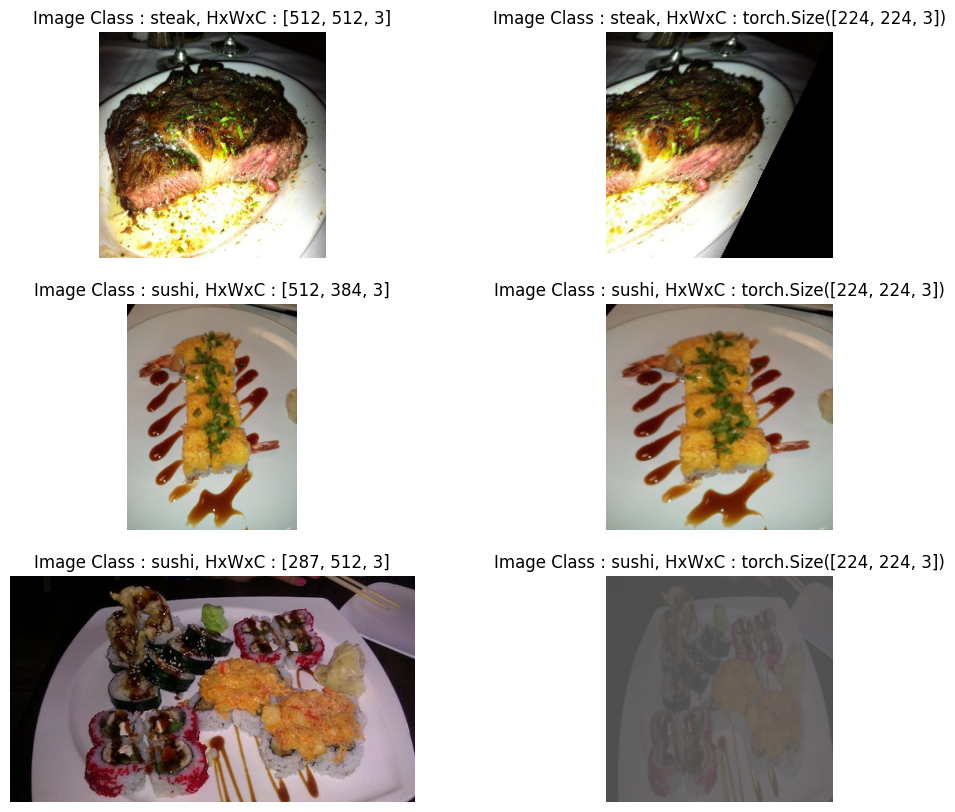

In [29]:
# Create trivial augment data transformer
trivial_augmenter = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

img_path = Path("data/pizza_steak_sushi")

plot_transformed_image(image_paths=list(img_path.glob("*/*/*.jpg")), transformer=trivial_augmenter, n=3, seed=None)

## Build computer vision model using custom DataSet

In [2]:
# Download & Unzip image data
import requests
import zipfile
from pathlib import Path

# Create directory in which to store image data
data_dir = Path('data/pizza_steak_sushi')
if data_dir.is_dir():
  print(f"Directory {data_dir} already exists - skipping download")
else:
  print(f"Directory {data_dir} does not exist - creating directory")
  data_dir.mkdir(parents=True, exist_ok=True)

# Download & Unzip Pizza, Steak, Sushi Data
with open("data/pizza_steak_sushi/pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading sushi, steak, pizza image data...")
  f.write(request.content)

with zipfile.ZipFile(data_dir / 'pizza_steak_sushi.zip', "r") as zip_ref:
  print("Unzipping pizza, steak, sushi data")
  zip_ref.extractall(data_dir)

Directory data/pizza_steak_sushi does not exist - creating directory
Unzipping pizza, steak, sushi data


In [3]:
# Creating transforms & loading data
import torchvision.transforms as transforms
train_transform0 = transforms.Compose([
    transforms.Resize(size=(64,64)),   # Resize to 64x64 as required by TinyVGG architecture
    transforms.ToTensor()    # Convert image data to tensors
])


test_transform0 = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [4]:
# Create training & testing image datasets using ImageFolder
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

train_dir = data_dir / 'train'
test_dir = data_dir / 'test'

train_data0 = ImageFolder(train_dir,
                         transform = train_transform0,
                         target_transform=None)

test_data0 = ImageFolder(test_dir,
                        transform = test_transform0,
                        target_transform=None)

# Turn ImageFolder datasets in DataLoaders to use it with PyTorch model
BATCH_SIZE = 32
NUM_WORKERS = 0

train_dataloader0 = DataLoader(train_data0,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=NUM_WORKERS)

test_dataloader0 = DataLoader(test_data0,
                              batch_size=BATCH_SIZE,
                              shuffle=False,
                              num_workers=NUM_WORKERS)

In [5]:
# Model 0: TinyVGG without Data Augmentation
import torch
import torch.nn as nn

class TinyVGGModel0(nn.Module):
  def __init__(self, input_shape, output_shape, hidden_channels=10):
    super().__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_channels,
                  kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_channels, out_channels=hidden_channels,
                  kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_channels, out_channels=hidden_channels,
                  kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_channels, out_channels=hidden_channels,
                  kernel_size=3, stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
    )

    self.layer3 = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_channels*13*13,
                  out_features = output_shape)
    )

  def forward(self, x):
    return self.layer3(self.layer2(self.layer1(x)))

# Create instance of the model
tinyVGG_model0 = TinyVGGModel0(input_shape=3, output_shape=len(train_data0.classes))

In [6]:
# Test forward pass of data through Model
image_batch, label_batch = next(iter(train_dataloader0))  # Generate sample image & label data

tinyVGG_model0(image_batch) # Carry out forward pass

tensor([[-0.0138, -0.0442, -0.0553],
        [-0.0129, -0.0462, -0.0541],
        [-0.0107, -0.0420, -0.0518],
        [-0.0096, -0.0482, -0.0582],
        [-0.0056, -0.0353, -0.0538],
        [-0.0124, -0.0457, -0.0563],
        [-0.0101, -0.0415, -0.0515],
        [-0.0088, -0.0462, -0.0593],
        [-0.0069, -0.0470, -0.0571],
        [-0.0126, -0.0405, -0.0531],
        [-0.0143, -0.0360, -0.0484],
        [-0.0041, -0.0436, -0.0607],
        [-0.0109, -0.0455, -0.0577],
        [-0.0086, -0.0459, -0.0541],
        [-0.0098, -0.0357, -0.0565],
        [-0.0103, -0.0435, -0.0571],
        [-0.0071, -0.0456, -0.0583],
        [-0.0091, -0.0420, -0.0523],
        [-0.0089, -0.0446, -0.0546],
        [-0.0138, -0.0471, -0.0533],
        [-0.0044, -0.0421, -0.0512],
        [-0.0153, -0.0507, -0.0567],
        [-0.0070, -0.0449, -0.0569],
        [-0.0132, -0.0390, -0.0556],
        [-0.0091, -0.0459, -0.0522],
        [-0.0082, -0.0478, -0.0569],
        [-0.0107, -0.0494, -0.0553],
 

In [38]:
### Use `torchinfo` to get an idea of the shapes going through the TinyVGG model

# Install torchinfo if necessary
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

# Print summary of TinyVGG model layer output shapes
from torchinfo import summary
summary(tinyVGG_model0, input_size=(BATCH_SIZE, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGGModel0                            [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 10, 60, 60]          910
│    └─ReLU: 2-4                         [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 10, 30, 30]          --
├─Sequential: 1-2                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-6                       [32, 10, 28, 28]          910
│    └─ReLU: 2-7                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-8                       [32, 10, 26, 26]          910
│    └─ReLU: 2-9                         [32, 10, 26, 26]          --
│    └─MaxPool2d: 2-10                   [32, 10, 13, 13]          --
├─Sequentia

In [7]:
# Create training and testing loop functions
def train_loop(model : nn.Module,
               dataloader : torch.utils.data.DataLoader,
               optimizer : torch.optim,
               loss_fn, acc_fn, device : torch.device):
  # Set model to training mode
  model.train()

  # Initialize loss & accuracy scores
  epoch_loss, epoch_acc = 0, 0

  # Loop through DataLoader for training
  for images, labels in dataloader:
    images, labels  = images.to(device), labels.to(device)  # Move images & labels to GPU

    batch_output = model(images) # Carry out forward pass
    batch_loss = loss_fn(batch_output, labels) # Calculate batch loss
    batch_acc = acc_fn(batch_output, labels) # Calculate batch accuraacy

    epoch_loss += batch_loss
    epoch_acc += batch_acc

    # Carry out gradient descent
    optimizer.zero_grad()  # Reset optimizer gradient
    batch_loss.backward()  # Carry out backpropagation
    optimizer.step()    # Update model parameters

  # Calculate overall epoch loss & accuracy
  epoch_loss /= len(dataloader)
  epoch_acc /= len(dataloader)

  return {'model_name' : model.__class__.__name__,
          'train_loss' : epoch_loss, 'train_acc' : epoch_acc}




def eval_loop(model : nn.Module,
              dataloader : torch.utils.data.DataLoader,
              loss_fn, acc_fn, device : torch.device):

  # Initialize loss & accuracy scores
  epoch_loss, epoch_acc = 0, 0

  # Set model to evaluation mode
  model.eval()
  with torch.inference_mode():
    # Loop through DataLoader for testing
    for images, labels in dataloader:
      images, labels  = images.to(device), labels.to(device)  # Move images & labels to GPU

      batch_output = model(images) # Carry out forward pass
      batch_loss = loss_fn(batch_output, labels) # Calculate batch loss
      batch_acc = acc_fn(batch_output, labels) # Calculate batch accuraacy

      epoch_loss += batch_loss
      epoch_acc += batch_acc

    # Calculate overall epoch loss & accuracy
    epoch_loss /= len(dataloader)
    epoch_acc /= len(dataloader)

  return {'model_name' : model.__class__.__name__,
          'test_loss' : epoch_loss, 'test_acc' : epoch_acc}

In [8]:
# Define device agnostic code, loss function, accuracy function & optimizer
try:
  import torchmetrics
except:
  !pip install torchmetrics
  import torchmetrics

from torchmetrics import Accuracy

# Set up GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

tinyVGG_model0 = tinyVGG_model0.to(device)  # Move model to GPU

# Define loss & accuracy functions
loss_fn = nn.CrossEntropyLoss()
acc_fn = Accuracy(task='multiclass', num_classes = len(train_data0.classes))

loss_fn, acc_fn = loss_fn.to(device), acc_fn.to(device) # Move accuracy & loss functions to GPU

# Define optimizer
optimizer = torch.optim.SGD(tinyVGG_model0.parameters(),
                            lr=0.001)

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [10]:
from tqdm.auto import tqdm

# Carry out model training
num_epochs = 100

train_losses, test_losses = [], [] # Create lists to store training & test losses
train_accs, test_accs = [], []  # Create lists to store training & test accuracies

for epoch in tqdm(range(num_epochs)):

  train_results = train_loop(tinyVGG_model0, train_dataloader0,
                             optimizer, loss_fn, acc_fn, device)

  test_results = eval_loop(tinyVGG_model0, test_dataloader0,
                           loss_fn, acc_fn, device)

  # Print epoch results every 10 epochs
  if epoch % 10 == 0:
    print(f"Epoch = {epoch}:\
    \nTraining Loss = {train_results['train_loss']:.4f}, Training Accuracy = {train_results['train_acc']:.4f}\
    \nTesting Loss = {test_results['test_loss']:.4f}, Testing Accuracy = {test_results['test_acc']:.4f}")

  # Add training results to lists
  train_losses.append(train_results['train_loss'])
  train_accs.append(train_results['train_acc'])

  # Add testing results to lists
  test_losses.append(test_results['test_loss'])
  test_accs.append(test_results['test_acc'])


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch = 0:    
Training Loss = 1.0942, Training Accuracy = 0.4258    
Testing Loss = 1.1030, Testing Accuracy = 0.2604
Epoch = 10:    
Training Loss = 1.0925, Training Accuracy = 0.4258    
Testing Loss = 1.1027, Testing Accuracy = 0.2604
Epoch = 20:    
Training Loss = 1.1015, Training Accuracy = 0.3047    
Testing Loss = 1.1016, Testing Accuracy = 0.2604
Epoch = 30:    
Training Loss = 1.0920, Training Accuracy = 0.4258    
Testing Loss = 1.1052, Testing Accuracy = 0.2604
Epoch = 40:    
Training Loss = 1.0895, Training Accuracy = 0.4258    
Testing Loss = 1.1140, Testing Accuracy = 0.2604
Epoch = 50:    
Training Loss = 1.0961, Training Accuracy = 0.3047    
Testing Loss = 1.1228, Testing Accuracy = 0.2604
Epoch = 60:    
Training Loss = 1.0983, Training Accuracy = 0.3047    
Testing Loss = 1.1202, Testing Accuracy = 0.2604
Epoch = 70:    
Training Loss = 1.0974, Training Accuracy = 0.3047    
Testing Loss = 1.1178, Testing Accuracy = 0.2604
Epoch = 80:    
Training Loss = 1.0924, T

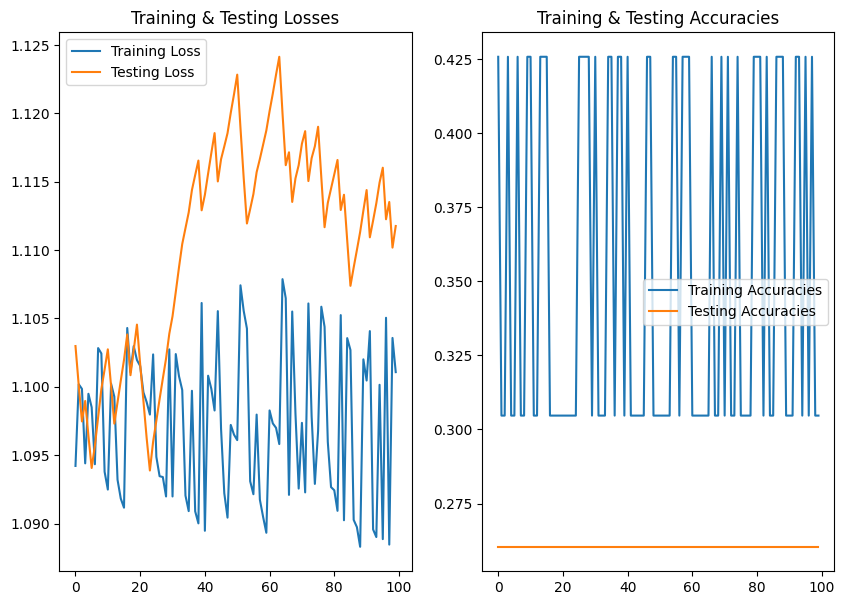

In [11]:
# Plot training & testing loss curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.plot(torch.stack(train_losses).detach().cpu(), label='Training Loss')
plt.plot(torch.stack(test_losses).cpu(), label='Testing Loss')
plt.title("Training & Testing Losses")
plt.legend()

plt.subplot(1,2,2)
plt.plot(torch.stack(train_accs).cpu(), label='Training Accuracies')
plt.plot(torch.stack(test_accs).cpu(), label='Testing Accuracies')
plt.title("Training & Testing Accuracies")
plt.legend()

plt.show()

### Testing model with reduced batchsize (batchsize = 4)

In [12]:
# Turn ImageFolder datasets in DataLoaders to use it with PyTorch model
BATCH_SIZE = 4
NUM_WORKERS = 0

train_dataloader0 = DataLoader(train_data0,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=NUM_WORKERS)

test_dataloader0 = DataLoader(test_data0,
                              batch_size=BATCH_SIZE,
                              shuffle=False,
                              num_workers=NUM_WORKERS)

# Create instance of the model
tinyVGG_model0 = TinyVGGModel0(input_shape=3, output_shape=len(train_data0.classes)).to(device)

# Define optimizer
optimizer = torch.optim.SGD(tinyVGG_model0.parameters(),
                            lr=0.001)

# Carry out model training
num_epochs = 100

train_losses, test_losses = [], [] # Create lists to store training & test losses
train_accs, test_accs = [], []  # Create lists to store training & test accuracies

for epoch in tqdm(range(num_epochs)):

  train_results = train_loop(tinyVGG_model0, train_dataloader0,
                             optimizer, loss_fn, acc_fn, device)

  test_results = eval_loop(tinyVGG_model0, test_dataloader0,
                           loss_fn, acc_fn, device)

  # Print epoch results every 10 epochs
  if epoch % 10 == 0:
    print(f"Epoch = {epoch}:\
    \nTraining Loss = {train_results['train_loss']:.4f}, Training Accuracy = {train_results['train_acc']:.4f}\
    \nTesting Loss = {test_results['test_loss']:.4f}, Testing Accuracy = {test_results['test_acc']:.4f}")

  # Add training results to lists
  train_losses.append(train_results['train_loss'])
  train_accs.append(train_results['train_acc'])

  # Add testing results to lists
  test_losses.append(test_results['test_loss'])
  test_accs.append(test_results['test_acc'])

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch = 0:    
Training Loss = 1.0994, Training Accuracy = 0.3421    
Testing Loss = 1.0973, Testing Accuracy = 0.3289
Epoch = 10:    
Training Loss = 1.0980, Training Accuracy = 0.3553    
Testing Loss = 1.1014, Testing Accuracy = 0.3289
Epoch = 20:    
Training Loss = 1.0981, Training Accuracy = 0.3421    
Testing Loss = 1.1019, Testing Accuracy = 0.3289
Epoch = 30:    
Training Loss = 1.0975, Training Accuracy = 0.3421    
Testing Loss = 1.0995, Testing Accuracy = 0.3289
Epoch = 40:    
Training Loss = 1.0966, Training Accuracy = 0.3421    
Testing Loss = 1.1000, Testing Accuracy = 0.3289
Epoch = 50:    
Training Loss = 1.0943, Training Accuracy = 0.3421    
Testing Loss = 1.0961, Testing Accuracy = 0.3289
Epoch = 60:    
Training Loss = 1.0896, Training Accuracy = 0.4079    
Testing Loss = 1.0922, Testing Accuracy = 0.3684
Epoch = 70:    
Training Loss = 1.0747, Training Accuracy = 0.5000    
Testing Loss = 1.0794, Testing Accuracy = 0.3947
Epoch = 80:    
Training Loss = 1.0076, T

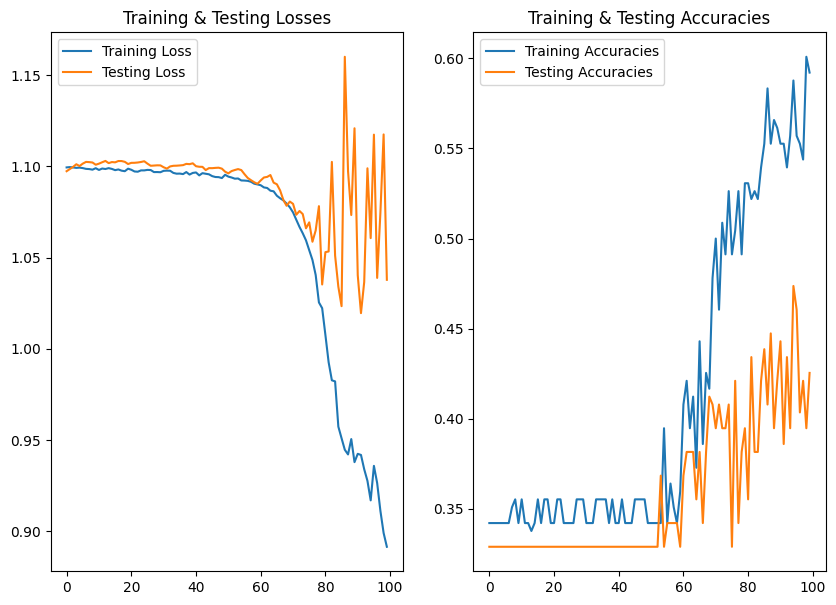

In [13]:
# Plot training & testing loss curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.plot(torch.stack(train_losses).detach().cpu(), label='Training Loss')
plt.plot(torch.stack(test_losses).cpu(), label='Testing Loss')
plt.title("Training & Testing Losses")
plt.legend()

plt.subplot(1,2,2)
plt.plot(torch.stack(train_accs).cpu(), label='Training Accuracies')
plt.plot(torch.stack(test_accs).cpu(), label='Testing Accuracies')
plt.title("Training & Testing Accuracies")
plt.legend()

plt.show()

Based on the above results we can see that reducing the batch size from 32 -> 4 improve the training of the model which is likely due to the fact that a batchsize of 32 was too large given that our overall training dataset consisted of only 225 images.

However, when using this reduced batch size we see that the model begins to overfit to the training data after approximately 65 epochs. One common way to overcome the problem of overfitting is to increase the size of the training dataset, thus we will use Data Augmentation to artificially increase the number of images in the training datasets.

In [14]:
### Using Data Augmentation to increase the size of the training dataset

# Create transformere that implements the Trivial Augmenter
augment_transformer = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transformer = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

# Create training and testing dataset which incorporate the Data Augmentations
train_dir = data_dir / 'train'
test_dir = data_dir / 'test'

train_data1 = ImageFolder(train_dir,
                         transform = augment_transformer)

test_data1 = ImageFolder(test_dir,
                         transform = test_transformer)

# Turn ImageFolder datasets in DataLoaders to use it with PyTorch model
BATCH_SIZE = 4
NUM_WORKERS = 0

train_dataloader1 = DataLoader(train_data1,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=NUM_WORKERS)

test_dataloader1 = DataLoader(test_data1,
                              batch_size=BATCH_SIZE,
                              shuffle=False,
                              num_workers=NUM_WORKERS)

In [15]:
# Create new model which uses Data Augmentation
tinyVGG_model2 = TinyVGGModel0(input_shape=3, output_shape=len(train_data1.classes))

In [16]:
# Train new model using augmented data
# Set up GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

tinyVGG_model2 = tinyVGG_model2.to(device)  # Move model to GPU

# Define loss & accuracy functions
loss_fn = nn.CrossEntropyLoss()
acc_fn = Accuracy(task='multiclass', num_classes = len(train_data1.classes))

loss_fn, acc_fn = loss_fn.to(device), acc_fn.to(device) # Move accuracy & loss functions to GPU

# Define optimizer
optimizer = torch.optim.SGD(tinyVGG_model2.parameters(),
                            lr=0.001)

cpu


In [17]:
from tqdm.auto import tqdm

# Carry out model training
num_epochs = 100

train_losses, test_losses = [], [] # Create lists to store training & test losses
train_accs, test_accs = [], []  # Create lists to store training & test accuracies

for epoch in tqdm(range(num_epochs)):

  train_results = train_loop(tinyVGG_model2, train_dataloader1,
                             optimizer, loss_fn, acc_fn, device)

  test_results = eval_loop(tinyVGG_model2, test_dataloader1,
                           loss_fn, acc_fn, device)

  # Print epoch results every 10 epochs
  if epoch % 10 == 0:
    print(f"Epoch = {epoch}:\
    \nTraining Loss = {train_results['train_loss']:.4f}, Training Accuracy = {train_results['train_acc']:.4f}\
    \nTesting Loss = {test_results['test_loss']:.4f}, Testing Accuracy = {test_results['test_acc']:.4f}")

  # Add training results to lists
  train_losses.append(train_results['train_loss'])
  train_accs.append(train_results['train_acc'])

  # Add testing results to lists
  test_losses.append(test_results['test_loss'])
  test_accs.append(test_results['test_acc'])

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch = 0:    
Training Loss = 1.1017, Training Accuracy = 0.3158    
Testing Loss = 1.0939, Testing Accuracy = 0.4211
Epoch = 10:    
Training Loss = 1.0985, Training Accuracy = 0.3509    
Testing Loss = 1.0989, Testing Accuracy = 0.3289
Epoch = 20:    
Training Loss = 1.0983, Training Accuracy = 0.3421    
Testing Loss = 1.1014, Testing Accuracy = 0.3289
Epoch = 30:    
Training Loss = 1.0975, Training Accuracy = 0.3553    
Testing Loss = 1.1026, Testing Accuracy = 0.3289
Epoch = 40:    
Training Loss = 1.0986, Training Accuracy = 0.3421    
Testing Loss = 1.1026, Testing Accuracy = 0.3289
Epoch = 50:    
Training Loss = 1.0980, Training Accuracy = 0.3421    
Testing Loss = 1.1020, Testing Accuracy = 0.3289
Epoch = 60:    
Training Loss = 1.0961, Training Accuracy = 0.3553    
Testing Loss = 1.1019, Testing Accuracy = 0.3289
Epoch = 70:    
Training Loss = 1.0968, Training Accuracy = 0.3465    
Testing Loss = 1.1004, Testing Accuracy = 0.3421
Epoch = 80:    
Training Loss = 1.0939, T

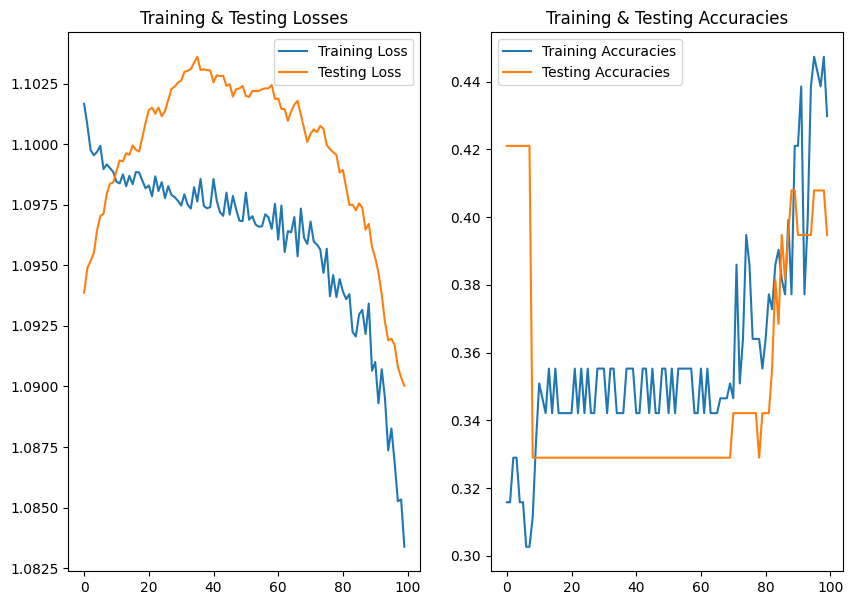

In [18]:
# Plot training & testing loss curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.plot(torch.stack(train_losses).detach().cpu(), label='Training Loss')
plt.plot(torch.stack(test_losses).cpu(), label='Testing Loss')
plt.title("Training & Testing Losses")
plt.legend()

plt.subplot(1,2,2)
plt.plot(torch.stack(train_accs).cpu(), label='Training Accuracies')
plt.plot(torch.stack(test_accs).cpu(), label='Testing Accuracies')
plt.title("Training & Testing Accuracies")
plt.legend()

plt.show()

## Miscellaneous Testing

In [ ]:
### Testing to understand tensor dimensions
tensor1 = torch.rand(size=(1,1,2,2))
tensor2 = torch.rand(size=(1,3,2,2))

tensor1, tensor2

### Learning how to use the `conv2d` function

In [ ]:
# Create dummy tensor to put through the convolutional layer
dummy_tensor = torch.rand((1,1,64,64))

# Create convolutional layer
conv_layer = nn.Conv2d(in_channels=1, out_channels= 10,
                       kernel_size=3, stride=1, padding=1)

max_pool = nn.MaxPool2d(kernel_size=2)

relu = nn.ReLU()

In [ ]:
conv_layer(dummy_tensor).shape, relu(conv_layer(dummy_tensor)).shape, max_pool(relu(conv_layer(dummy_tensor))).shape